In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
import matplotlib as mpl
import matplotlib.cm as cm
from matplotlib import rcParams
# Set Font
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
# Set Hatch Width
mpl.rcParams['hatch.linewidth'] = 3.0

In [3]:
notebook_home = os.path.join(os.path.abspath(''), 'experiment_results')
homepath = os.path.join(os.path.abspath(''), "experiment_results")
stat_results = os.path.join(homepath, "stat") 
lookup_results = os.path.join(homepath, "lookup") 
modify_results = os.path.join(homepath, "modify") 
top10_results = os.path.join(homepath, "top10_results")
excel_results = os.path.join(homepath, "excel_results")
calc_results = os.path.join(homepath, "calc_results")
enron_stat, github_stat = os.path.join(stat_results, "enron"), os.path.join(stat_results, "github")
enron_lookup, github_lookup = os.path.join(lookup_results, "enron"), os.path.join(lookup_results, "github")
enron_modify, github_modify = os.path.join(modify_results, "enron"), os.path.join(modify_results, "github")

In [4]:
GRAPH_COLOR = cm.YlGnBu
color_dict = {
    "Excel": GRAPH_COLOR(110),
    "TACO": GRAPH_COLOR(250),
    "NoComp": GRAPH_COLOR(190),
    "Antifreeze": GRAPH_COLOR(110),
    "RedisGraph": GRAPH_COLOR(60),
    "Maximum Dependents": GRAPH_COLOR(190),
    "Longest Path": GRAPH_COLOR(90),
    "NoComp-Calc": GRAPH_COLOR(60),
}
edge_color_dict = {
    "TACO": "white",
    "NoComp": "white",
    "Maximum Dependents": "white"
}
style_dict = {
    "TACO": "--",
    "NoComp": "-",
    "Maximum Dependents":"-.",
    "Longest Path": "-"
}
hatch_dict = {
    "Excel": '/',
    "TACO": 'x',
    "NoComp": '|',
    "Antifreeze": '-',
    "RedisGraph": '/',
    "Maximum Dependents": '|',
    "Longest Path": '/',
    "NoComp-Calc": "-"
}
rcParams['font.family'] = 'Serif'
legend_size = 50
label_size = 60
tick_size = 60
fig_width = 16
fig_height = 10

In [5]:
def get_pdf_df(df, column_name, is_log=True):
    ls = [x if x >= 1 else 1 for x in df[column_name]]
    length = len(ls)
    if is_log:
        data = pd.Series(np.log10(ls))
    else:
        data = pd.Series(ls)
    freq = data.value_counts().sort_index(axis=0, ascending=True).reset_index() 
    freq[0] = freq[0] / length
    freq['cumsum'] = np.cumsum(freq[0])
    return freq

In [6]:
def convert_upper_str(num):
    upper_ls = '⁰¹²³⁴⁵⁶⁷⁸⁹'
    index = int(np.log10(num))
    return str(10) + upper_ls[int(np.log10(num))]

In [7]:
def plot_percentile(df_ls, 
                    legend_ls, 
                    xlabel, 
                    ylabel, 
                    x_tick_min,
                    x_tick_max,
                    x_tick_num,
                    y_ticks=None,
                    fig_size=(fig_width, fig_height),
                    legend_size=legend_size,
                    tick_size=tick_size,
                    label_size=label_size,
                    color_dict=color_dict,
                    save_path=None):
    assert len(df_ls) == len(legend_ls)
    fig, ax = plt.subplots(figsize=fig_size)
    for i in range(len(df_ls)):
        df, label = df_ls[i], legend_ls[i]
        ax.plot(df['index'], df['cumsum'], label=label, color=color_dict[label], linestyle=style_dict[label], linewidth=7.)
    
    ax.set_xlabel(xlabel, fontsize=label_size)
    ax.set_ylabel(ylabel, fontsize=label_size)
    x_ticks = np.arange(x_tick_min, x_tick_max+0.1, step=(x_tick_max - x_tick_min)/x_tick_num).astype(int)
    ax.set_xticks(x_ticks)
    ax.set_xticklabels([convert_upper_str(10**x) for x in x_ticks], fontsize=tick_size)
    if y_ticks is None:
        plt.yticks(fontsize=tick_size)
    else:
        ax.set_yticks(y_ticks)
        ax.set_yticklabels(y_ticks, fontsize=tick_size)
    ax.legend(fontsize=legend_size, loc="lower right")
    ax.grid(True)
    fig.tight_layout()
    
    if save_path is not None:
        plt.savefig(save_path)
    plt.show()

In [8]:
def plot_percentile_transpose(df_ls, 
                    legend_ls, 
                    xlabel, 
                    ylabel, 
                    y_tick_min,
                    y_tick_max,
                    y_tick_num,
                    fig_size=(fig_width, fig_height),
                    legend_size=legend_size,
                    tick_size=tick_size,
                    label_size=label_size,
                    color_dict=color_dict,
                    save_path=None):
    
    assert len(df_ls) == len(legend_ls)
    fig, ax = plt.subplots(figsize=fig_size)
    for i in range(len(df_ls)):
        df, label = df_ls[i], legend_ls[i]
        ax.plot(df['cumsum'], df['index'], label=label, color=color_dict[label], linewidth=4.0)
    
    ax.set_xlabel(xlabel, fontsize=label_size)
    ax.set_ylabel(ylabel, fontsize=label_size)
    y_ticks = np.arange(y_tick_min, y_tick_max+0.1, step=(y_tick_max - y_tick_min)/y_tick_num).astype(int)
    ax.set_yticks(y_ticks)
    ax.set_yticklabels([convert_upper_str(10**x) for x in y_ticks], fontsize=tick_size)
    x_ticks = np.array([0.0, 0.25, 0.5, 0.75, 1.0])
    ax.set_xticks(x_ticks)
    ax.set_xticklabels([str(x) for x in x_ticks], fontsize=tick_size)
    ax.legend(fontsize=legend_size, loc="upper left")
    fig.tight_layout()
    
    if save_path is not None:
        plt.savefig(save_path)
    plt.show()

In [9]:
def plot_bar_chart(df,
                   file_list,
                   label_column_dict,
                   xlabel,
                   ylabel,
                   y_tick_min,
                   y_tick_max,
                   y_tick_num,
                   y_lim=np.log10(5*60*1000) + 0.02,
                   bar_width=0.2,
                   fig_size=(fig_width, fig_height),
                   legend_size=legend_size,
                   tick_size=tick_size,
                   label_size=label_size,
                   color_dict=color_dict,
                   hatch_dict=hatch_dict,
                   edge_color_dict=edge_color_dict,
                   is_seperate=True,
                   save_path=None
                  ):
    
    x_ticks = np.arange(len(file_list))
    x_ticks_min, x_ticks_max = 100, -100
    bar_labels = list(label_column_dict.keys())
    num_bars = len(bar_labels)
    fig, ax = plt.subplots(figsize=fig_size)
    MAX_VALUE = 5*60*1000
    
    for idx, bar_label in enumerate(bar_labels):
        x = x_ticks - ((num_bars - 1) * bar_width)/2 + idx * bar_width
        x_ticks_min = min(x.min(), x_ticks_min)
        x_ticks_max = max(x.max(), x_ticks_max)
        arr = df[label_column_dict[bar_label]].values
        
        # Preprocessing invalid values
        arr = np.array([x if x != -1 else MAX_VALUE for x in arr])
        arr = np.array([x if x >= 1.0 else 1.0 for x in arr])
        arr = np.array([x if x < MAX_VALUE else 0.0 for x in arr])
        
        # Bars
        if bar_label in edge_color_dict:
            rect = ax.bar(x_ticks - ((num_bars - 1) * bar_width)/2 + idx * bar_width,
                          np.log10(arr) + 0.5,
                          bar_width, label=bar_label,
                          color=color_dict[bar_label],
                          hatch=hatch_dict[bar_label],
                          edgecolor=edge_color_dict[bar_label],
                          alpha=.99,
                          bottom=-0.5
                         )
        else:
            rect = ax.bar(x_ticks - ((num_bars - 1) * bar_width)/2 + idx * bar_width,
                          np.log10(arr) + 0.5,
                          bar_width, label=bar_label,
                          color=color_dict[bar_label],
                          hatch=hatch_dict[bar_label],
                          alpha=.99,
                          bottom=-0.5
                         )
        
        # Red 'X'
        for i in range(len(x_ticks)):
            if arr[i] == 0.0:
                x_loc = x_ticks[i] - ((num_bars - 1) * bar_width)/2 + idx * bar_width
                y_loc = -0.28
                plt.scatter(x_loc, y_loc, s=1500, c='r', marker='X')
    
    # Seperate Line between Enron and Github
    if is_seperate:
        plt.axvline(x=(x_ticks_min + x_ticks_max) / 2.0, ymax=np.log10(5*60*1000)-0.1, color='g', ls='--', linewidth=3.0)
    
    ax.set_xlabel(xlabel, fontsize=label_size)
    ax.set_ylabel(ylabel, fontsize=label_size)
    
    y_ticks = np.arange(y_tick_min, y_tick_max+0.1, step=(y_tick_max - y_tick_min)/y_tick_num).astype(int)
    ax.set_yticks(y_ticks)
    ax.set_yticklabels([convert_upper_str(10**x) for x in y_ticks], fontsize=tick_size)
    
    ax.set_xticks(x_ticks)
    ax.set_xticklabels(file_list, fontsize=tick_size, rotation=-45)
    ax.legend(fontsize=legend_size, loc="upper right", ncol=num_bars)
    plt.xlim(x_ticks_min-bar_width/2.0, x_ticks_max+bar_width/2.0)
    
    plt.ylim(-0.4, y_lim)
    plt.grid(axis='y')
    fig.tight_layout()
    
    if save_path is not None:
        plt.savefig(save_path)
    plt.show()

# 1. Compressed Formula Graph Sizes

In [10]:
def graph_compare_preprocess(df, is_inrow=False):
    df['Edges_Diff'] = df['numEdges'] - df['numCompEdges']
    df['Edges_Prec'] = df['numCompEdges'] / df['numEdges']
    if not is_inrow:
        pattern_type = ['RR', 'RF', 'FR', 'FF', 'RR-Chain']
        for pattern in pattern_type:
            if pattern != 'RRGap':
                df[pattern + "_Diff"] = df[pattern + "_NoComp"] - df[pattern + "_Comp"]
            else:
                df[pattern + "_Diff"] = 0
                gaps = ['One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven']
                for gap in gaps:
                    pattern_name = pattern + gap
                    df[pattern + "_Diff"] += (df[pattern_name + "_NoComp"] - df[pattern_name + "_Comp"])
    return df

In [11]:
df_enron_stat = graph_compare_preprocess(pd.read_csv(enron_stat + "/" + "enron_taco_dollar_stat.csv"))
df_github_stat = graph_compare_preprocess(pd.read_csv(github_stat + "/" + "github_taco_dollar_stat.csv"))
df_enron_inrow_stat = graph_compare_preprocess(pd.read_csv(enron_stat + "/" + "enron_taco_inrow_stat.csv"), True)
df_github_inrow_stat = graph_compare_preprocess(pd.read_csv(github_stat + "/" + "github_taco_inrow_stat.csv"), True)

## 1.1 Formula graph sizes after TACO compression (low is better)

In [12]:
df_graph_enron_compare = pd.DataFrame()
df_graph_enron_compare.index = ['NoComp', 'TACO-Inrow', 'TACO']
df_graph_enron_compare['Vertices'] = [df_enron_stat['numVertices'].sum(), df_enron_inrow_stat['numCompVertices'].sum(), df_enron_stat['numCompVertices'].sum()]
df_graph_enron_compare['Edges'] = [df_enron_stat['numEdges'].sum(), df_enron_inrow_stat['numCompEdges'].sum(), df_enron_stat['numCompEdges'].sum()]
df_graph_enron_compare['Vertices_Percentage'] = df_graph_enron_compare['Vertices'] / df_graph_enron_compare['Vertices'].max()
df_graph_enron_compare['Edges_Percentage'] = df_graph_enron_compare['Edges'] / df_graph_enron_compare['Edges'].max()
df_graph_enron_compare

,Vertices,Edges,Vertices_Percentage,Edges_Percentage
NoComp,18645760,23733499,1.000000,1.000000
TACO-Inrow,7680116,12521118,0.411896,0.527572
TACO,1173102,1183680,0.062915,0.049874


In [13]:
df_graph_github_compare = pd.DataFrame()
df_graph_github_compare.index = ['NoComp', 'TACO-Inrow', 'TACO']
df_graph_github_compare['Vertices'] = [df_github_stat['numVertices'].sum(), df_github_inrow_stat['numCompVertices'].sum(), df_github_stat['numCompVertices'].sum()]
df_graph_github_compare['Edges'] = [df_github_stat['numEdges'].sum(), df_github_inrow_stat['numCompVertices'].sum(), df_github_stat['numCompEdges'].sum()]
df_graph_github_compare['Vertices_Percentage'] = df_graph_github_compare['Vertices'] / df_graph_github_compare['Vertices'].max()
df_graph_github_compare['Edges_Percentage'] = df_graph_github_compare['Edges'] / df_graph_github_compare['Edges'].max()
df_graph_github_compare

,Vertices,Edges,Vertices_Percentage,Edges_Percentage
NoComp,165771046,179788109,1.000000,1.000000
TACO-Inrow,55202083,55202083,0.333002,0.307040
TACO,4192821,3493528,0.025293,0.019431


## 1.2 The number of edges reduced by TACO (high is better)

In [14]:
df_enron_edge_reduce = pd.DataFrame()
df_enron_edge_reduce['TACO-Inrow'] = df_enron_inrow_stat['Edges_Diff']
df_enron_edge_reduce['TACO'] = df_enron_stat['Edges_Diff']
df_enron_edge_reduce.describe().T[['max', '75%', '50%', 'mean']]

,max,75%,50%,mean
TACO-Inrow,142396.0,18196.0,12488.5,18876.062290
TACO,700155.0,37285.5,18379.5,37962.658249


In [15]:
df_github_edge_reduce = pd.DataFrame()
df_github_edge_reduce['TACO-Inrow'] = df_github_inrow_stat['Edges_Diff']
df_github_edge_reduce['TACO'] = df_github_stat['Edges_Diff']
df_github_edge_reduce.describe().T[['max', '75%', '50%', 'mean']]

,max,75%,50%,mean
TACO-Inrow,1693698.0,42728.0,19703.5,45303.024532
TACO,3139011.0,75552.5,31607.5,78632.730152


## 1.3 Remaining edge fractions after compression (low is better)

In [16]:
df_enron_edge_prec = pd.DataFrame()
df_enron_edge_prec['TACO-Inrow'] = df_enron_inrow_stat['Edges_Prec']
df_enron_edge_prec['TACO'] = df_enron_stat['Edges_Prec']
df_enron_edge_prec.describe().T[['min', '25%', '50%', 'mean']]

,min,25%,50%,mean
TACO-Inrow,0.000042,0.063182,0.398134,0.422732
TACO,0.000042,0.004712,0.019261,0.073657


In [17]:
df_github_edge_prec = pd.DataFrame()
df_github_edge_prec['TACO-Inrow'] = df_github_inrow_stat['Edges_Prec']
df_github_edge_prec['TACO'] = df_github_stat['Edges_Prec']
df_github_edge_prec.describe().T[['min', '25%', '50%', 'mean']]

,min,25%,50%,mean
TACO-Inrow,0.000005,0.000994,0.174480,0.364801
TACO,0.000005,0.000317,0.001901,0.034441


## 1.4 Number of edges reduced by each pattern (high is better)

In [18]:
df_enron_pattern_reduce = pd.DataFrame()
pattern_type = ['RR', 'RF', 'FR', 'FF', 'RR-Chain']
for pattern in pattern_type:
    df_enron_pattern_reduce[pattern] = df_enron_stat[pattern + "_Diff"]
df_enron_pattern_stat = pd.DataFrame()
df_enron_pattern_stat.index = df_enron_pattern_reduce.T.index
df_enron_pattern_stat['Sum'] = df_enron_pattern_reduce.sum()
df_enron_pattern_stat['Max'] = df_enron_pattern_reduce.max()
df_enron_pattern_stat

,Sum,Max
RR,17412246,525026
RF,1880,1413
FR,150845,13815
FF,3844351,174948
RR-Chain,566348,24596


In [19]:
df_github_pattern_reduce = pd.DataFrame()
pattern_type = ['RR', 'RF', 'FR', 'FF', 'RR-Chain']
for pattern in pattern_type:
    df_github_pattern_reduce[pattern] = df_github_stat[pattern + "_Diff"]
df_github_pattern_stat = pd.DataFrame()
df_github_pattern_stat.index = df_github_pattern_reduce.T.index
df_github_pattern_stat['Sum'] = df_github_pattern_reduce.sum()
df_github_pattern_stat['Max'] = df_github_pattern_reduce.max()
df_github_pattern_stat

,Sum,Max
RR,141876182,2094936
RF,13361,9999
FR,178609,39008
FF,24784621,1043702
RR-Chain,5867728,399996


# 2. Building Graphs

In [20]:
column_list = ['fileName', 'GraphBuildTime']
df_enron_taco_max = pd.read_csv(f"{enron_lookup}/enron_max_taco_10k_1.csv")[column_list]
df_enron_taco_long = pd.read_csv(f"{enron_lookup}/enron_long_taco_10k_1.csv")[column_list]
df_enron_nocomp_max = pd.read_csv(f"{enron_lookup}/enron_max_nocomp_10k_1.csv")[column_list]
df_enron_nocomp_long = pd.read_csv(f"{enron_lookup}/enron_long_nocomp_10k_1.csv")[column_list]
df_github_taco_max =  pd.read_csv(f"{github_lookup}/github_max_taco_10k_1.csv")[column_list]
df_github_taco_long = pd.read_csv(f"{github_lookup}/github_long_taco_10k_1.csv")[column_list]
df_github_nocomp_max = pd.read_csv(f"{github_lookup}/github_max_nocomp_10k_1.csv")[column_list]
df_github_nocomp_long = pd.read_csv(f"{github_lookup}/github_long_nocomp_10k_1.csv")[column_list]

In [21]:
df_enron_taco = pd.merge(df_enron_taco_max, df_enron_taco_long, how="inner", on=["fileName"])
df_enron_nocomp = pd.merge(df_enron_nocomp_max, df_enron_nocomp_long, how="inner", on=["fileName"])
df_enron_taco['TACO_GraphBuildTime'] = (df_enron_taco['GraphBuildTime_x'] + df_enron_taco['GraphBuildTime_y']) / 2.
df_enron_nocomp['NoComp_GraphBuildTime'] = (df_enron_nocomp['GraphBuildTime_x'] + df_enron_nocomp['GraphBuildTime_y']) / 2.

In [22]:
enron_graph_result = pd.merge(df_enron_taco, df_enron_nocomp, how="inner", on=['fileName'])[['fileName', 'TACO_GraphBuildTime', 'NoComp_GraphBuildTime']]

In [23]:
freq_enron_taco = get_pdf_df(enron_graph_result, 'TACO_GraphBuildTime')
freq_enron_nocomp = get_pdf_df(enron_graph_result, 'NoComp_GraphBuildTime')

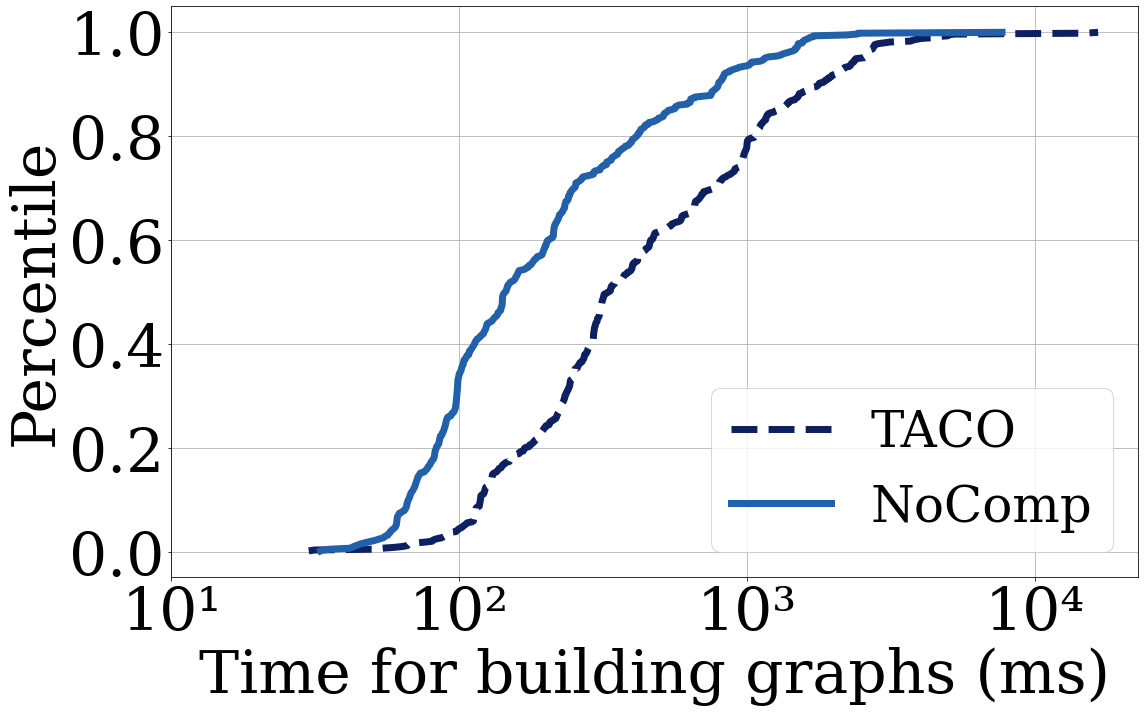

In [24]:
plot_percentile([freq_enron_taco, freq_enron_nocomp], 
                ["TACO", "NoComp"],
                xlabel="Time for building graphs (ms)",
                ylabel="Percentile",
                x_tick_min=1,
                x_tick_max=4,
                x_tick_num=3,
                #save_path="./figures/enron_graph_build_compare.pdf"
               )

In [25]:
df_github_taco = pd.merge(df_github_taco_max, df_github_taco_long, how="inner", on=["fileName"])
df_github_nocomp = pd.merge(df_github_nocomp_max, df_github_nocomp_long, how="inner", on=["fileName"])
df_github_taco['TACO_GraphBuildTime'] = (df_github_taco['GraphBuildTime_x'] + df_github_taco['GraphBuildTime_y']) / 2.
df_github_nocomp['NoComp_GraphBuildTime'] = (df_github_nocomp['GraphBuildTime_x'] + df_github_nocomp['GraphBuildTime_y']) / 2.

In [26]:
github_graph_result = pd.merge(df_github_taco, df_github_nocomp, how="inner", on=['fileName'])[['fileName', 'TACO_GraphBuildTime', 'NoComp_GraphBuildTime']]

In [27]:
freq_github_taco = get_pdf_df(github_graph_result, 'TACO_GraphBuildTime')
freq_github_nocomp = get_pdf_df(github_graph_result, 'NoComp_GraphBuildTime')

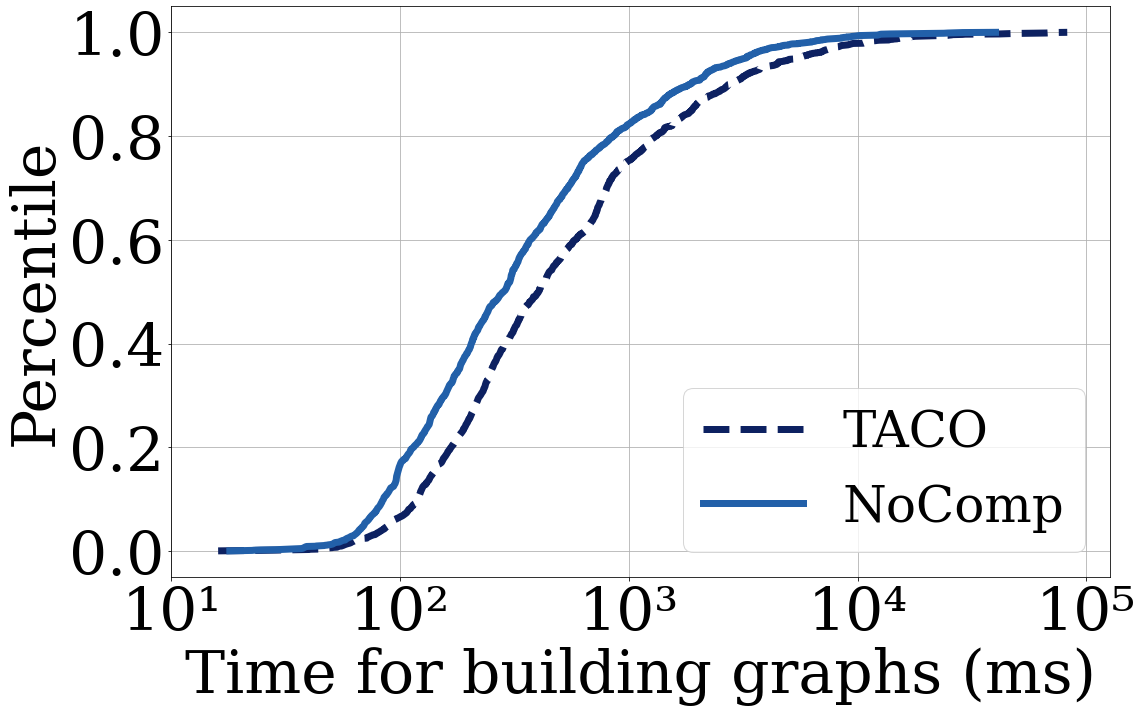

In [28]:
plot_percentile([freq_github_taco, freq_github_nocomp], 
                ["TACO", "NoComp"],
                xlabel="Time for building graphs (ms)",
                ylabel="Percentile",
                x_tick_min=1,
                x_tick_max=5,
                x_tick_num=4,
                #save_path="./figures/github_graph_build_compare.pdf"
               )

# 3. Returning Control to Users

In [29]:
def rename_columns(df, is_long=False):
    rename_map = {
        "TACOLookupSize": "taco_size",
        "TACOLookupTime": "taco_time",
        "TACOPostProcessedLookupSize": "taco_post_size",
        "TACOPostProcessedLookupTime": "taco_post_time",
        "NoCompLookupSize": "nocomp_size",
        "NoCompLookupTime": "nocomp_time",
        "NoCompPostProcessedLookupSize": "nocomp_post_size",
        "NoCompPostProcessedLookupTime": "nocomp_post_time",
    }
    
    if is_long:
        for key in rename_map:
            rename_map[key] = "long_" + rename_map[key]
    else:
        for key in rename_map:
            rename_map[key] = "max_" + rename_map[key]
            
    df = df.rename(columns=rename_map)
    if "GraphBuildTime" in list(df.columns):
        df = df.drop(['GraphBuildTime'], axis=1)
    
    remain_cols = [x for x in list(df.columns) if "post" not in x]
    return df[remain_cols]

In [30]:
def read_and_average_files(dir_path, fileName, is_long=False):
    df = rename_columns(pd.read_csv(dir_path + "/" + fileName + "_1.csv"), is_long)
    df2 = rename_columns(pd.read_csv(dir_path + "/" + fileName + "_2.csv"), is_long)
    df3 = rename_columns(pd.read_csv(dir_path + "/" + fileName + "_3.csv"), is_long)
    column_list = list(df.columns)
    df_merged = pd.merge(df, df2, how="inner", on=[column_list[0], column_list[1]])
    df_merged = pd.merge(df_merged, df3, how="inner", on=[column_list[0], column_list[1]])
    list1, list2 = [], []
    for i in range(len(df_merged)):
        ls = [df_merged.loc[i, col_name] for col_name in list(df_merged.columns) if column_list[2] in col_name]
        ls2 = [df_merged.loc[i, col_name] for col_name in list(df_merged.columns) if column_list[3] in col_name]
        list1.append(np.mean(ls))
        list2.append(np.mean(ls2))
    df_merged[column_list[2]] = list1
    df_merged[column_list[3]] = list2
    return df_merged[column_list]

In [31]:
df_enron_taco_max = read_and_average_files(enron_lookup, "enron_max_taco_10k", False)
df_enron_taco_long = read_and_average_files(enron_lookup, "enron_long_taco_10k", True)
df_enron_nocomp_max = read_and_average_files(enron_lookup, "enron_max_nocomp_10k", False)
df_enron_nocomp_long = read_and_average_files(enron_lookup, "enron_long_nocomp_10k", True)
df_github_taco_max = read_and_average_files(github_lookup, "github_max_taco_10k", False)
df_github_taco_long = read_and_average_files(github_lookup, "github_long_taco_10k", True)
df_github_nocomp_max = read_and_average_files(github_lookup, "github_max_nocomp_10k", False)
df_github_nocomp_long = read_and_average_files(github_lookup, "github_long_nocomp_10k", True)

In [32]:
df_enron_max = pd.merge(df_enron_taco_max, df_enron_nocomp_max, how="inner", on=["fileName", "Max Dep Ref"])
df_enron_long = pd.merge(df_enron_taco_long, df_enron_nocomp_long, how="inner", on=["fileName", "Longest Dep Ref"])

In [33]:
df_enron_merged = pd.merge(df_enron_max, df_enron_long, how="inner", on=["fileName"])

In [34]:
df_enron_merged.head()

,fileName,Max Dep Ref,max_taco_size,max_taco_time,max_nocomp_size,max_nocomp_time,Longest Dep Ref,long_taco_size,long_taco_time,long_nocomp_size,long_nocomp_time
0,stacey_white_000_1_1.pst.254.xls,AlphaSort:F6836,3.0,10.000000,3.0,25.333333,AlphaSort:F4400,3.0,10.000000,3.0,25.333333
1,darron_c_giron_002_1_1_1.pst.177.xls,Darron:E5,205.0,8.666667,2978.0,70.666667,Darron:J4,205.0,9.333333,2978.0,88.333333
2,stacey_white_000_1_1.pst.262.xls,BRA Power:A6,28.0,1.000000,4385.0,123.000000,BRA Power:A6,28.0,1.000000,4385.0,139.666667
3,mike_grigsby_000_1_1_1.pst.248.xls,Months:F4,4.0,0.333333,306.0,1.666667,Months:F4,4.0,0.333333,306.0,1.333333
4,kevin_ruscitti_000_1_1.pst.156.xls,03-21-00AM:BT499,1.0,0.666667,1.0,0.000000,03-21-00AM:X531,1.0,0.000000,1.0,1.000000


In [35]:
df_github_max = pd.merge(df_github_taco_max, df_github_nocomp_max, how="inner", on=["fileName", "Max Dep Ref"])
df_github_long = pd.merge(df_github_taco_long, df_github_nocomp_long, how="inner", on=["fileName", "Longest Dep Ref"])

In [36]:
df_github_merged = pd.merge(df_github_max, df_github_long, how="inner", on=["fileName"])

In [37]:
df_github_merged.head()

,fileName,Max Dep Ref,max_taco_size,max_taco_time,max_nocomp_size,max_nocomp_time,Longest Dep Ref,long_taco_size,long_taco_time,long_nocomp_size,long_nocomp_time
0,1. Excel Homework.xlsx,Sheet1:E4030,2.0,9.666667,2.0,24.000000,Sheet1:J3248,1.0,9.666667,1.0,24.333333
1,2019-05-23-0936_empty_racir.xlsx,Measurements:E13,20.0,1.666667,6600.0,141.333333,Measurements:C11,17.0,1.666667,5610.0,142.666667
2,NIRISS_SIAF.xlsx,Calc:AE3,30.0,1.000000,900.0,16.000000,DDC:C20,6.0,0.333333,22.0,0.333333
3,工作簿1-20181122170204822.xlsx,不良明细:CBJ5,1.0,0.000000,2.0,0.000000,不良明细:CEA5,1.0,0.000000,2.0,0.000000
4,W22704-181.xlsx,Sheet1:E2,4.0,0.000000,14196.0,173.666667,Sheet1:D2,4.0,0.333333,14196.0,136.666667


### CDF Plot

In [38]:
freq_enron_max_taco_size = get_pdf_df(df_enron_merged, 'max_taco_size', True)
freq_enron_max_nocomp_size = get_pdf_df(df_enron_merged, 'max_nocomp_size', True)
freq_enron_max_taco_time = get_pdf_df(df_enron_merged, 'max_taco_time', True)
freq_enron_max_nocomp_time = get_pdf_df(df_enron_merged, 'max_nocomp_time', True)
freq_enron_long_taco_size = get_pdf_df(df_enron_merged, 'long_taco_size', True)
freq_enron_long_nocomp_size = get_pdf_df(df_enron_merged, 'long_nocomp_size', True)
freq_enron_long_taco_time = get_pdf_df(df_enron_merged, 'long_taco_time', True)
freq_enron_long_nocomp_time = get_pdf_df(df_enron_merged, 'long_nocomp_time', True)

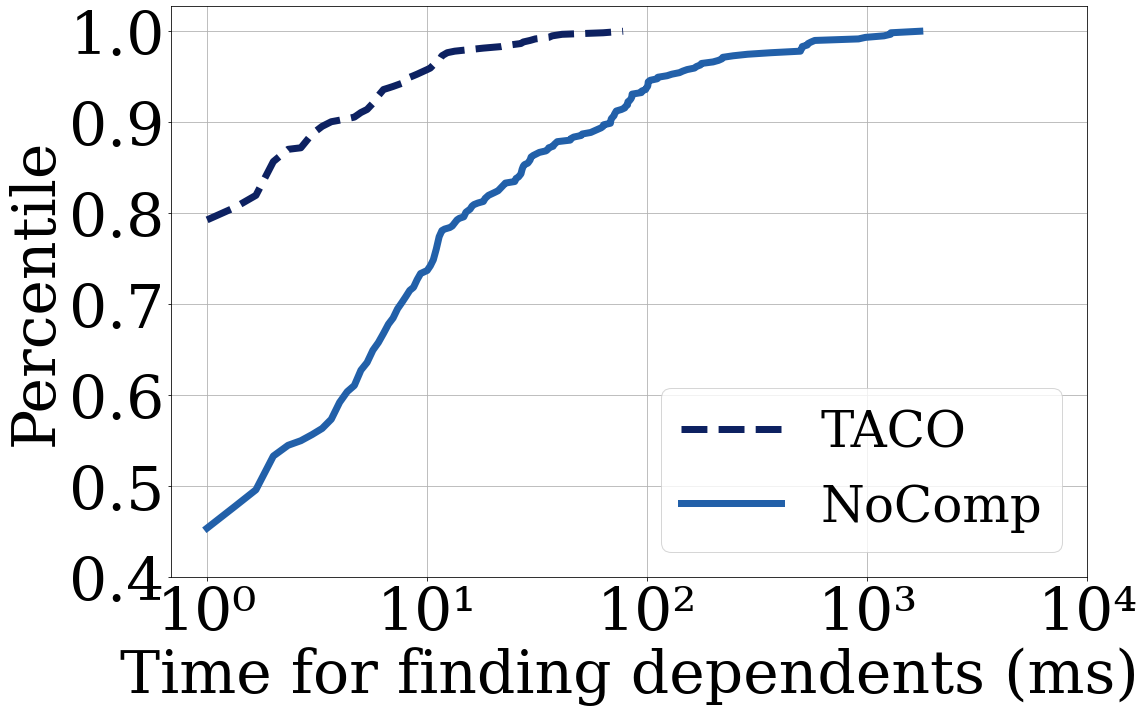

In [39]:
plot_percentile([freq_enron_max_taco_time, freq_enron_max_nocomp_time], 
                ["TACO", "NoComp"],
                xlabel="Time for finding dependents (ms)",
                ylabel="Percentile",
                x_tick_min=0,
                x_tick_max=4,
                x_tick_num=4,
                y_ticks=[0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                #save_path="./figures/enron_lookup_time_max_compare.pdf"
               )

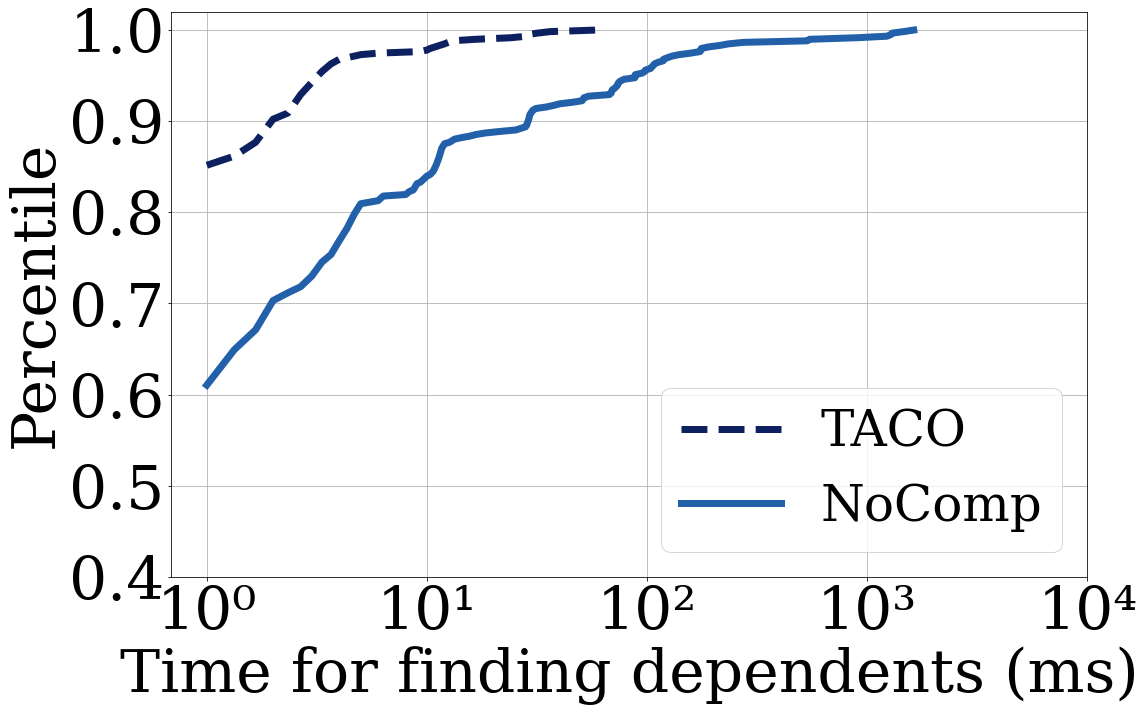

In [40]:
plot_percentile([freq_enron_long_taco_time, freq_enron_long_nocomp_time], 
                ["TACO", "NoComp"],
                xlabel="Time for finding dependents (ms)",
                ylabel="Percentile",
                x_tick_min=0,
                x_tick_max=4,
                x_tick_num=4,
                y_ticks=[0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                #save_path="./figures/enron_lookup_time_long_compare.pdf"
               )

In [41]:
freq_github_max_taco_size = get_pdf_df(df_github_merged, 'max_taco_size', True)
freq_github_max_nocomp_size = get_pdf_df(df_github_merged, 'max_nocomp_size', True)
freq_github_max_taco_time = get_pdf_df(df_github_merged, 'max_taco_time', True)
freq_github_max_nocomp_time = get_pdf_df(df_github_merged, 'max_nocomp_time', True)
freq_github_long_taco_size = get_pdf_df(df_github_merged, 'long_taco_size', True)
freq_github_long_nocomp_size = get_pdf_df(df_github_merged, 'long_nocomp_size', True)
freq_github_long_taco_time = get_pdf_df(df_github_merged, 'long_taco_time', True)
freq_github_long_nocomp_time = get_pdf_df(df_github_merged, 'long_nocomp_time', True)

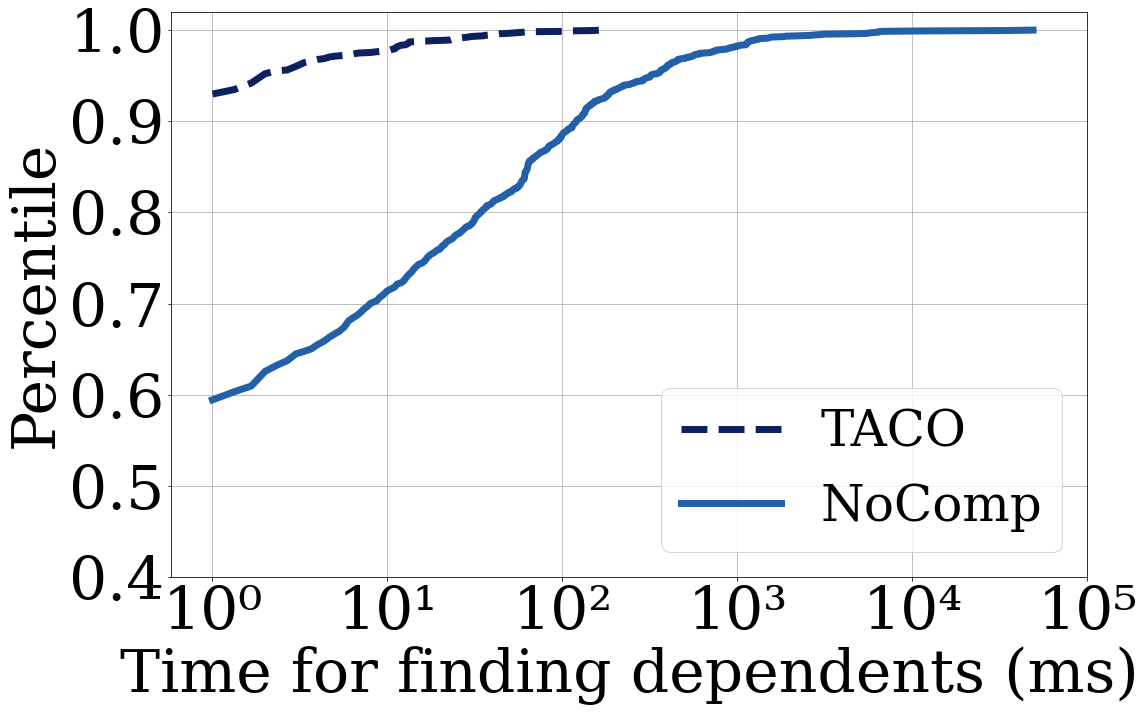

In [42]:
plot_percentile([freq_github_max_taco_time, freq_github_max_nocomp_time], 
                ["TACO", "NoComp"],
                xlabel="Time for finding dependents (ms)",
                ylabel="Percentile",
                x_tick_min=0,
                x_tick_max=5,
                x_tick_num=5,
                y_ticks=[0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                #save_path="./figures/github_lookup_time_max_compare.pdf"
               )

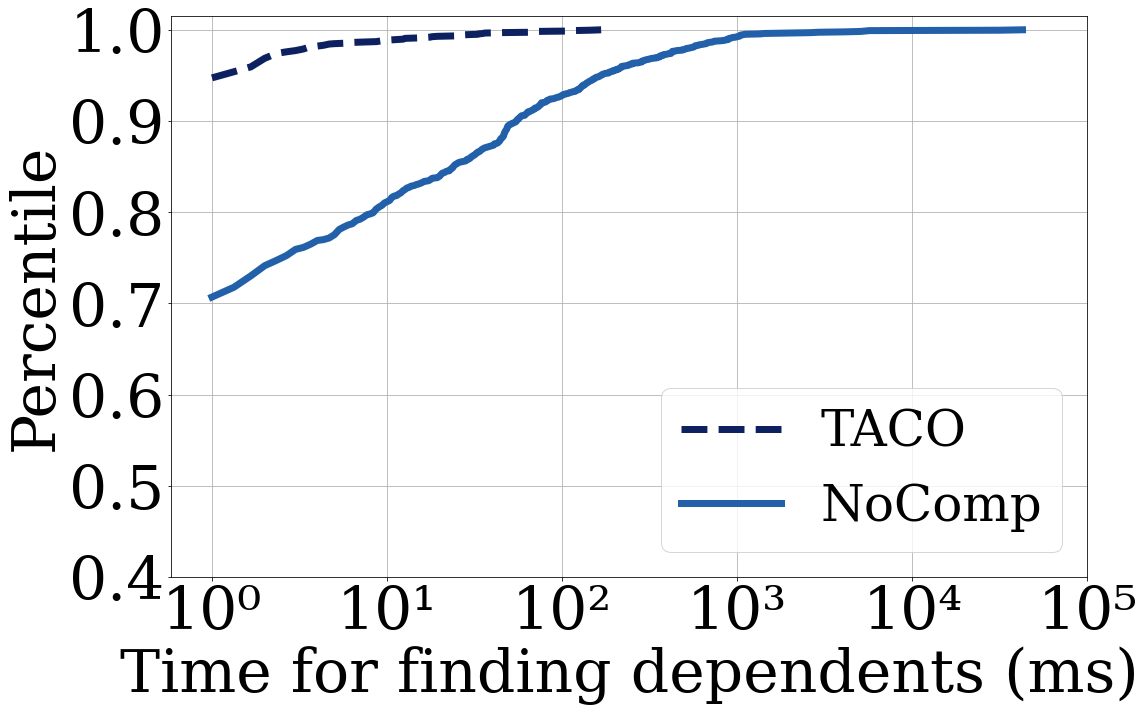

In [43]:
plot_percentile([freq_github_long_taco_time, freq_github_long_nocomp_time], 
                ["TACO", "NoComp"],
                xlabel="Time for finding dependents (ms)",
                ylabel="Percentile",
                x_tick_min=0,
                x_tick_max=5,
                x_tick_num=5,
                y_ticks=[0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                #save_path="./figures/github_lookup_time_long_compare.pdf"
               )

# 4. Modify Formula Graph

In [44]:
def load_modify_results(path, filename):
    filename_list = [filename + "_" + str(i) + ".csv" for i in [1, 2, 3]]
    column_list = ['fileName', 'Max Dep Ref', 'GraphModifyTime']
    df1 = pd.read_csv(path + "/" + filename_list[0])
    df2 = pd.read_csv(path + "/" + filename_list[1])
    df3 = pd.read_csv(path + "/" + filename_list[2])
    df = pd.merge(df1, df2, on=column_list[:2], how="inner")
    df = pd.merge(df, df3, on=column_list[:2], how="inner")
    
    time_ls = []
    cand_col = [x for x in list(df.columns) if "GraphModifyTime" in x]
    for i in range(len(df)):
        ls = []
        for col in cand_col:
            ls.append(df.loc[i, col])
        time_ls.append(np.mean(ls))
    df['GraphModifyTime'] = time_ls
    return df[column_list]

In [45]:
enron_nocomp_modify = load_modify_results(enron_modify, "enron_nocomp_modify")
enron_taco_modify = load_modify_results(enron_modify, "enron_taco_modify")
github_nocomp_modify = load_modify_results(github_modify, "github_nocomp_modify")
github_taco_modify = load_modify_results(github_modify, "github_taco_modify")

In [46]:
freq_enron_taco_modify = get_pdf_df(enron_taco_modify, 'GraphModifyTime', True)
freq_enron_nocomp_modify = get_pdf_df(enron_nocomp_modify, 'GraphModifyTime', True)

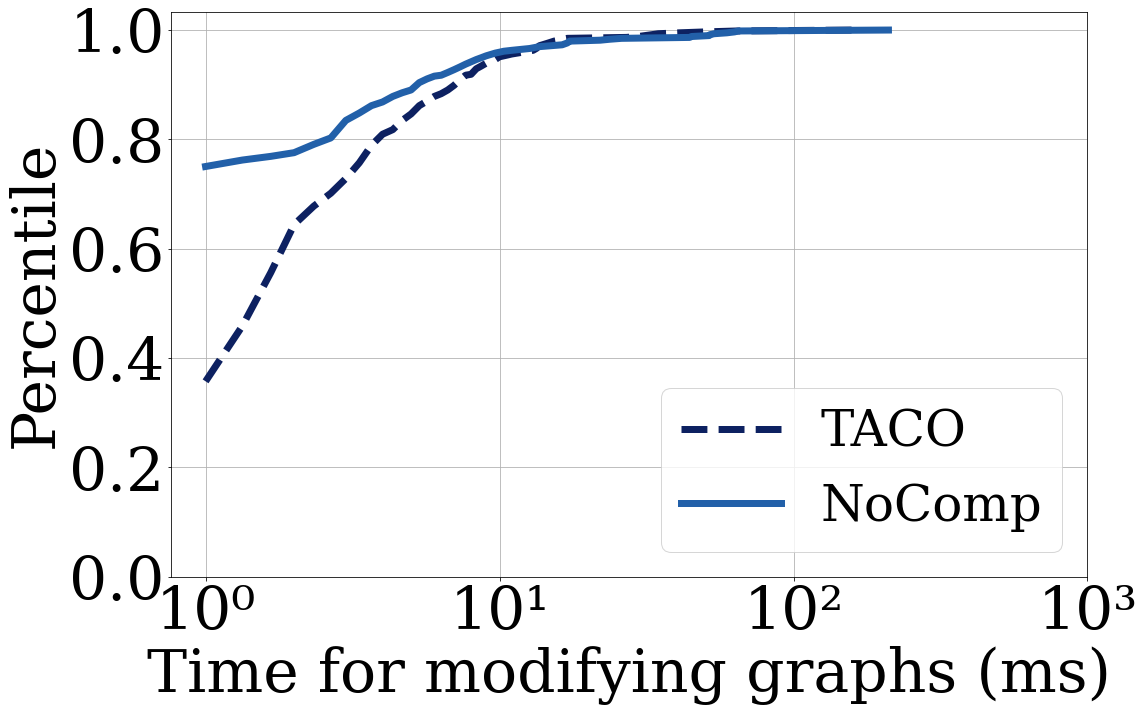

In [47]:
plot_percentile([freq_enron_taco_modify, freq_enron_nocomp_modify], 
                ["TACO", "NoComp"],
                xlabel="Time for modifying graphs (ms)",
                ylabel="Percentile",
                x_tick_min=0,
                x_tick_max=3,
                x_tick_num=3,
                y_ticks=[0.0, 0.2, 0.4, 0.6, 0.8, 1.0],
                #save_path="./figures/enron_modify_compare.pdf"
               )

In [48]:
freq_github_taco_modify = get_pdf_df(github_taco_modify, 'GraphModifyTime', True)
freq_github_nocomp_modify = get_pdf_df(github_nocomp_modify, 'GraphModifyTime', True)

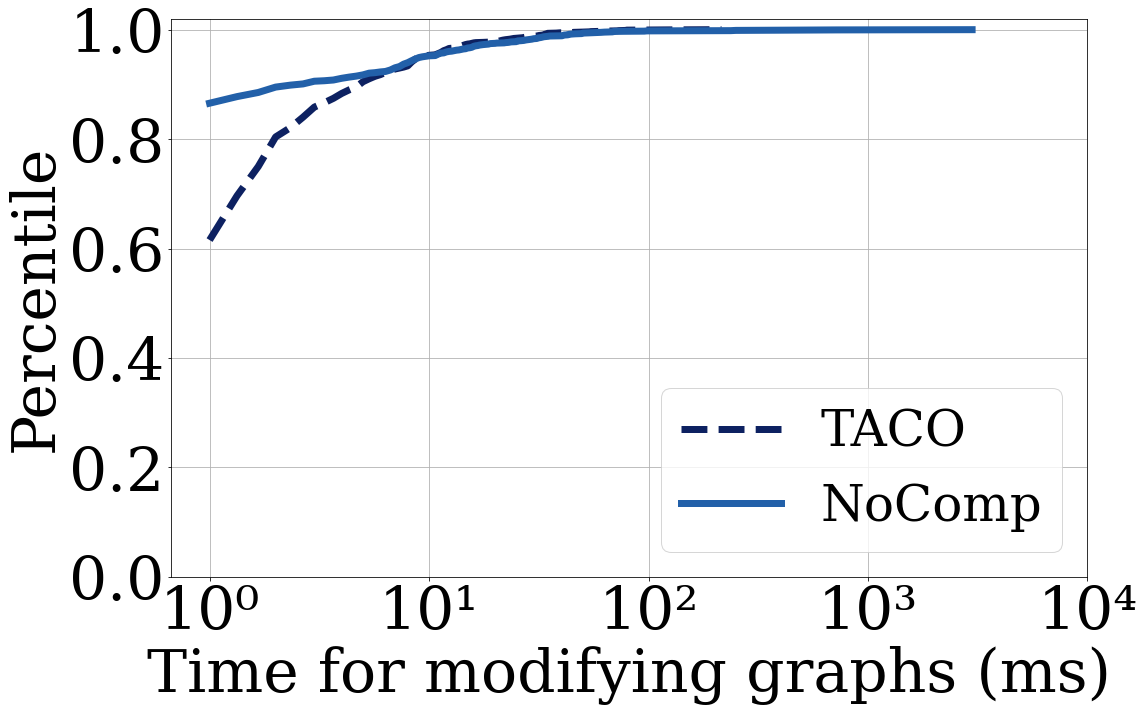

In [49]:
plot_percentile([freq_github_taco_modify, freq_github_nocomp_modify], 
                ["TACO", "NoComp"],
                xlabel="Time for modifying graphs (ms)",
                ylabel="Percentile",
                x_tick_min=0,
                x_tick_max=4,
                x_tick_num=4,
                y_ticks=[0.0, 0.2, 0.4, 0.6, 0.8, 1.0],
                #save_path="./figures/github_modify_compare.pdf"
               )

## 5. Top10 Results

In [50]:
def dnf_process(df, max_time=5*60*1000):
    plot_max_time = 5 * 60 * 1000
    column_name = ['LookupTime', 'GraphBuildTime', 'GraphModifyTime', 'max_redis_time', 'Redis_GraphBuildTime', 'Redis_GraphModifyTime']
    column_name = [name for name in column_name if name in df.columns]
    for i in range(len(df)):
        for name in column_name:
            if df.loc[i, name] == -1 or df.loc[i, name] >= max_time:
                df.loc[i, name] = plot_max_time
    return df

In [51]:
plot_filename_list = ['max' + str(i+1) for i in range(10)]
plot_filename_list.extend(plot_filename_list)
plot_filename_label = [' ' for i in range(len(plot_filename_list) * 2 + 20)]
length = len(plot_filename_label)
plot_filename_label[length // 3] = "Enron"
plot_filename_label[length - length // 3] = "Github"
plot_filename_label = " ".join(plot_filename_label)

In [52]:
filename_order = []
filename_order += enron_graph_result.sort_values(by="TACO_GraphBuildTime", ascending=False)['fileName'].tolist()[:10]
filename_order += github_graph_result.sort_values(by="TACO_GraphBuildTime", ascending=False)['fileName'].tolist()[:10]

### 5.1 Lookup Time

In [53]:
df_enron_merged['max_taco_time'] = df_enron_merged[['max_taco_time', 'long_taco_time']].T.max()
df_github_merged['max_taco_time'] = df_github_merged[['max_taco_time', 'long_taco_time']].T.max()
df_enron_merged['max_nocomp_time'] = df_enron_merged[['max_nocomp_time', 'long_nocomp_time']].T.max()
df_github_merged['max_nocomp_time'] = df_github_merged[['max_nocomp_time', 'long_nocomp_time']].T.max()

In [54]:
column_list = ["fileName", "RedisGraphLookupTime"]
df_enron_redis_1 = pd.read_csv(f"{enron_lookup}/enron_RedisGraph_M_1.csv")[column_list]
df_enron_redis_2 = pd.read_csv(f"{enron_lookup}/enron_RedisGraph_M_2.csv")[column_list]
df_enron_redis_3 = pd.read_csv(f"{enron_lookup}/enron_RedisGraph_M_3.csv")[column_list]
df_github_redis_1 = pd.read_csv(f"{github_lookup}/github_RedisGraph_M_1.csv")[column_list]
df_github_redis_2 = pd.read_csv(f"{github_lookup}/github_RedisGraph_M_2.csv")[column_list]
df_github_redis_3 = pd.read_csv(f"{github_lookup}/github_RedisGraph_M_3.csv")[column_list]
enron_lookup_redis = pd.merge(df_enron_redis_1, df_enron_redis_2, how="inner", on=["fileName"])
enron_lookup_redis = pd.merge(enron_lookup_redis, df_enron_redis_3, how="inner", on=["fileName"])
github_lookup_redis = pd.merge(df_github_redis_1, df_github_redis_2, how="inner", on=["fileName"])
github_lookup_redis = pd.merge(github_lookup_redis, df_github_redis_3, how="inner", on=["fileName"])
enron_lookup_redis["max_redis_time"] = (enron_lookup_redis["RedisGraphLookupTime_x"] + enron_lookup_redis["RedisGraphLookupTime_y"] + enron_lookup_redis["RedisGraphLookupTime"]) / 3.
github_lookup_redis["max_redis_time"] = (github_lookup_redis["RedisGraphLookupTime_x"] + github_lookup_redis["RedisGraphLookupTime_y"] + github_lookup_redis["RedisGraphLookupTime"]) / 3.

In [55]:
antifreeze_enron_lookup = pd.read_excel(f"{top10_results}/enron_antifreeze_lookup_result.xlsx")
antifreeze_github_lookup = pd.read_excel(f"{top10_results}/github_antifreeze_lookup_result.xlsx")

In [56]:
enron_lookup_top10 = df_enron_merged.sort_values(by="max_taco_time", ascending=False)[['fileName', 'max_taco_time', 'max_nocomp_time']]
github_lookup_top10 = df_github_merged.sort_values(by="max_taco_time", ascending=False)[['fileName', 'max_taco_time', 'max_nocomp_time']]

In [57]:
column_list = ['fileName', 'max_taco_time', 'max_nocomp_time', 'max_redis_time']
enron_lookup_top10 = pd.merge(enron_lookup_top10, enron_lookup_redis, on=["fileName"], how="inner")[column_list]
github_lookup_top10 = pd.merge(github_lookup_top10, github_lookup_redis, on=["fileName"], how="inner")[column_list]

In [58]:
enron_lookup_compare = dnf_process(pd.merge(enron_lookup_top10, antifreeze_enron_lookup, on=["fileName"], how="inner"), max_time=60000)
github_lookup_compare = dnf_process(pd.merge(github_lookup_top10, antifreeze_github_lookup, on=["fileName"], how="inner"), max_time=60000)

In [59]:
lookup_compare = pd.concat([enron_lookup_compare, github_lookup_compare]).reset_index(drop=True).set_index("fileName")
lookup_compare = lookup_compare.loc[filename_order].reset_index()
lookup_compare

,fileName,max_taco_time,max_nocomp_time,max_redis_time,LookupTime
0,benjamin_rogers_000_1_1.pst.39.xls,3.000000,1730.333333,2280.666667,300000
1,vkaminski_001_1_2_1.pst.62.xls,29.333333,273.333333,727.333333,300000
2,mark_haedicke_000_1_2.pst.31.xls,24.000000,285.333333,1648.666667,300000
3,gstorey_000_1_1.pst.116.xls,0.333333,25.000000,101.666667,0
4,john_lavorato_000_1_1_1.pst.57.xls,0.000000,17.000000,300000.000000,0
5,phillip_m_love_000_1_1.pst.476.xls,1.000000,71.000000,300000.000000,300000
6,harry_arora_000_1_1.pst.130.xls,0.333333,911.666667,300000.000000,300000
7,jim_schwieger_000_1_1.pst.111.xls,4.000000,8.333333,300000.000000,300000
8,vkaminski_002_1_1_1.pst.12.xls,0.333333,145.000000,314.666667,300000
9,kam_keiser_000_1_1.pst.16.xls,1.000000,108.000000,300000.000000,300000


<ipython-input-9-1e96aedf058a>:53: RuntimeWarning: divide by zero encountered in log10
  np.log10(arr) + 0.5,


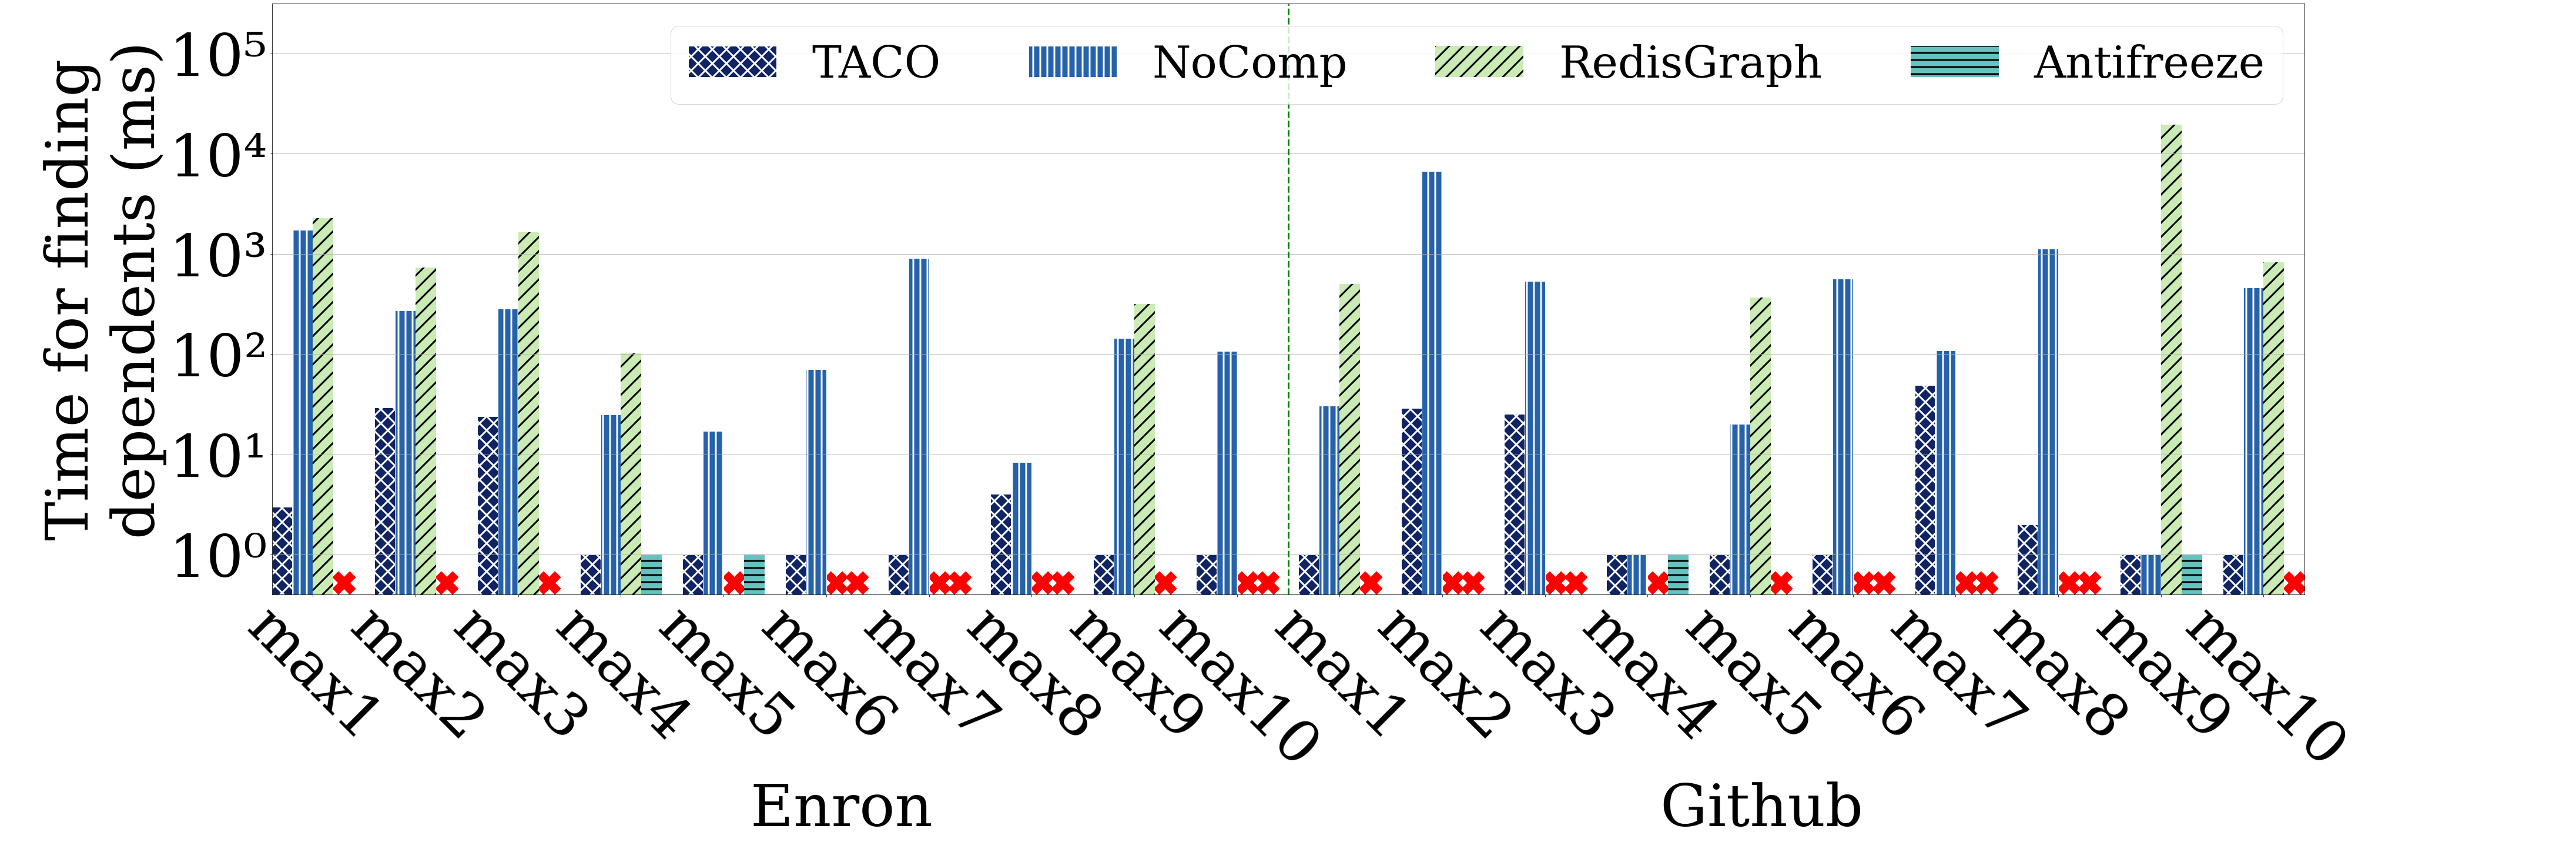

In [60]:
plot_bar_chart(lookup_compare, 
               plot_filename_list,
               label_column_dict={"TACO": "max_taco_time", "NoComp": "max_nocomp_time", "RedisGraph": "max_redis_time", "Antifreeze": "LookupTime"},
               xlabel=plot_filename_label,
               ylabel="Time for finding\n dependents (ms)",
               y_tick_min=0,
               y_tick_max=5,
               y_tick_num=5,
               legend_size=75,
               tick_size=100,
               label_size=100,
               fig_size=(55, 20),
               #save_path="./new_figs/lookup_compare.pdf"
              )

### 5.2 Graph Build Time

In [61]:
enron_graph_top10 = enron_graph_result.sort_values(by="TACO_GraphBuildTime", ascending=False)
github_graph_top10 = github_graph_result.sort_values(by="TACO_GraphBuildTime", ascending=False)

In [62]:
antifreeze_enron_build = pd.read_excel(f"{top10_results}/enron_antifreeze_graphbuild_result.xlsx")
antifreeze_github_build = pd.read_excel(f"{top10_results}/github_antifreeze_graphbuild_result.xlsx")

In [63]:
column_list = ["fileName", "GraphBuildTime"]
df_enron_redis_1 = pd.read_csv(f"{enron_lookup}/enron_RedisGraph_M_1.csv")[column_list]
df_enron_redis_2 = pd.read_csv(f"{enron_lookup}/enron_RedisGraph_M_2.csv")[column_list]
df_enron_redis_3 = pd.read_csv(f"{enron_lookup}/enron_RedisGraph_M_3.csv")[column_list]
df_github_redis_1 = pd.read_csv(f"{github_lookup}/github_RedisGraph_M_1.csv")[column_list]
df_github_redis_2 = pd.read_csv(f"{github_lookup}/github_RedisGraph_M_2.csv")[column_list]
df_github_redis_3 = pd.read_csv(f"{github_lookup}/github_RedisGraph_M_3.csv")[column_list]
enron_graph_redis = pd.merge(df_enron_redis_1, df_enron_redis_2, how="inner", on=["fileName"])
enron_graph_redis = pd.merge(enron_graph_redis, df_enron_redis_3, how="inner", on=["fileName"])
github_graph_redis = pd.merge(df_github_redis_1, df_github_redis_2, how="inner", on=["fileName"])
github_graph_redis = pd.merge(github_graph_redis, df_github_redis_3, how="inner", on=["fileName"])
enron_graph_redis["Redis_GraphBuildTime"] = (enron_graph_redis["GraphBuildTime_x"] + enron_graph_redis["GraphBuildTime_y"] + enron_graph_redis["GraphBuildTime"]) / 3.
github_graph_redis["Redis_GraphBuildTime"] = (github_graph_redis["GraphBuildTime_x"] + github_graph_redis["GraphBuildTime_y"] + github_graph_redis["GraphBuildTime"]) / 3.
enron_graph_redis = enron_graph_redis[['fileName', "Redis_GraphBuildTime"]]
github_graph_redis = github_graph_redis[['fileName', "Redis_GraphBuildTime"]]

In [64]:
enron_graph_compare = dnf_process(pd.merge(enron_graph_top10, antifreeze_enron_build, on=["fileName"], how="inner"))
github_graph_compare = dnf_process(pd.merge(github_graph_top10, antifreeze_github_build, on=["fileName"], how="inner"))
enron_graph_compare = dnf_process(pd.merge(enron_graph_compare, enron_graph_redis, on=["fileName"], how="inner"))
github_graph_compare = dnf_process(pd.merge(github_graph_compare, github_graph_redis, on=["fileName"], how="inner"))

In [65]:
graph_compare = pd.concat([enron_graph_compare, github_graph_compare]).reset_index(drop=True).set_index("fileName")
graph_compare = graph_compare.loc[filename_order].reset_index()
graph_compare

,fileName,TACO_GraphBuildTime,NoComp_GraphBuildTime,GraphBuildTime,Redis_GraphBuildTime
0,benjamin_rogers_000_1_1.pst.39.xls,16625.5,7703.5,300000.000000,13997.000000
1,vkaminski_001_1_2_1.pst.62.xls,14965.5,1451.5,300000.000000,10356.333333
2,mark_haedicke_000_1_2.pst.31.xls,5251.0,1571.0,300000.000000,40616.333333
3,gstorey_000_1_1.pst.116.xls,5006.5,2217.0,213745.333333,10327.666667
4,john_lavorato_000_1_1_1.pst.57.xls,4983.5,1584.0,137516.000000,5746.333333
5,phillip_m_love_000_1_1.pst.476.xls,4559.5,1506.5,300000.000000,300000.000000
6,harry_arora_000_1_1.pst.130.xls,4478.0,2436.0,300000.000000,226100.333333
7,jim_schwieger_000_1_1.pst.111.xls,4029.5,937.5,300000.000000,4772.000000
8,vkaminski_002_1_1_1.pst.12.xls,3886.5,1707.5,300000.000000,3986.666667
9,kam_keiser_000_1_1.pst.16.xls,3771.5,1388.0,300000.000000,300000.000000


<ipython-input-9-1e96aedf058a>:53: RuntimeWarning: divide by zero encountered in log10
  np.log10(arr) + 0.5,


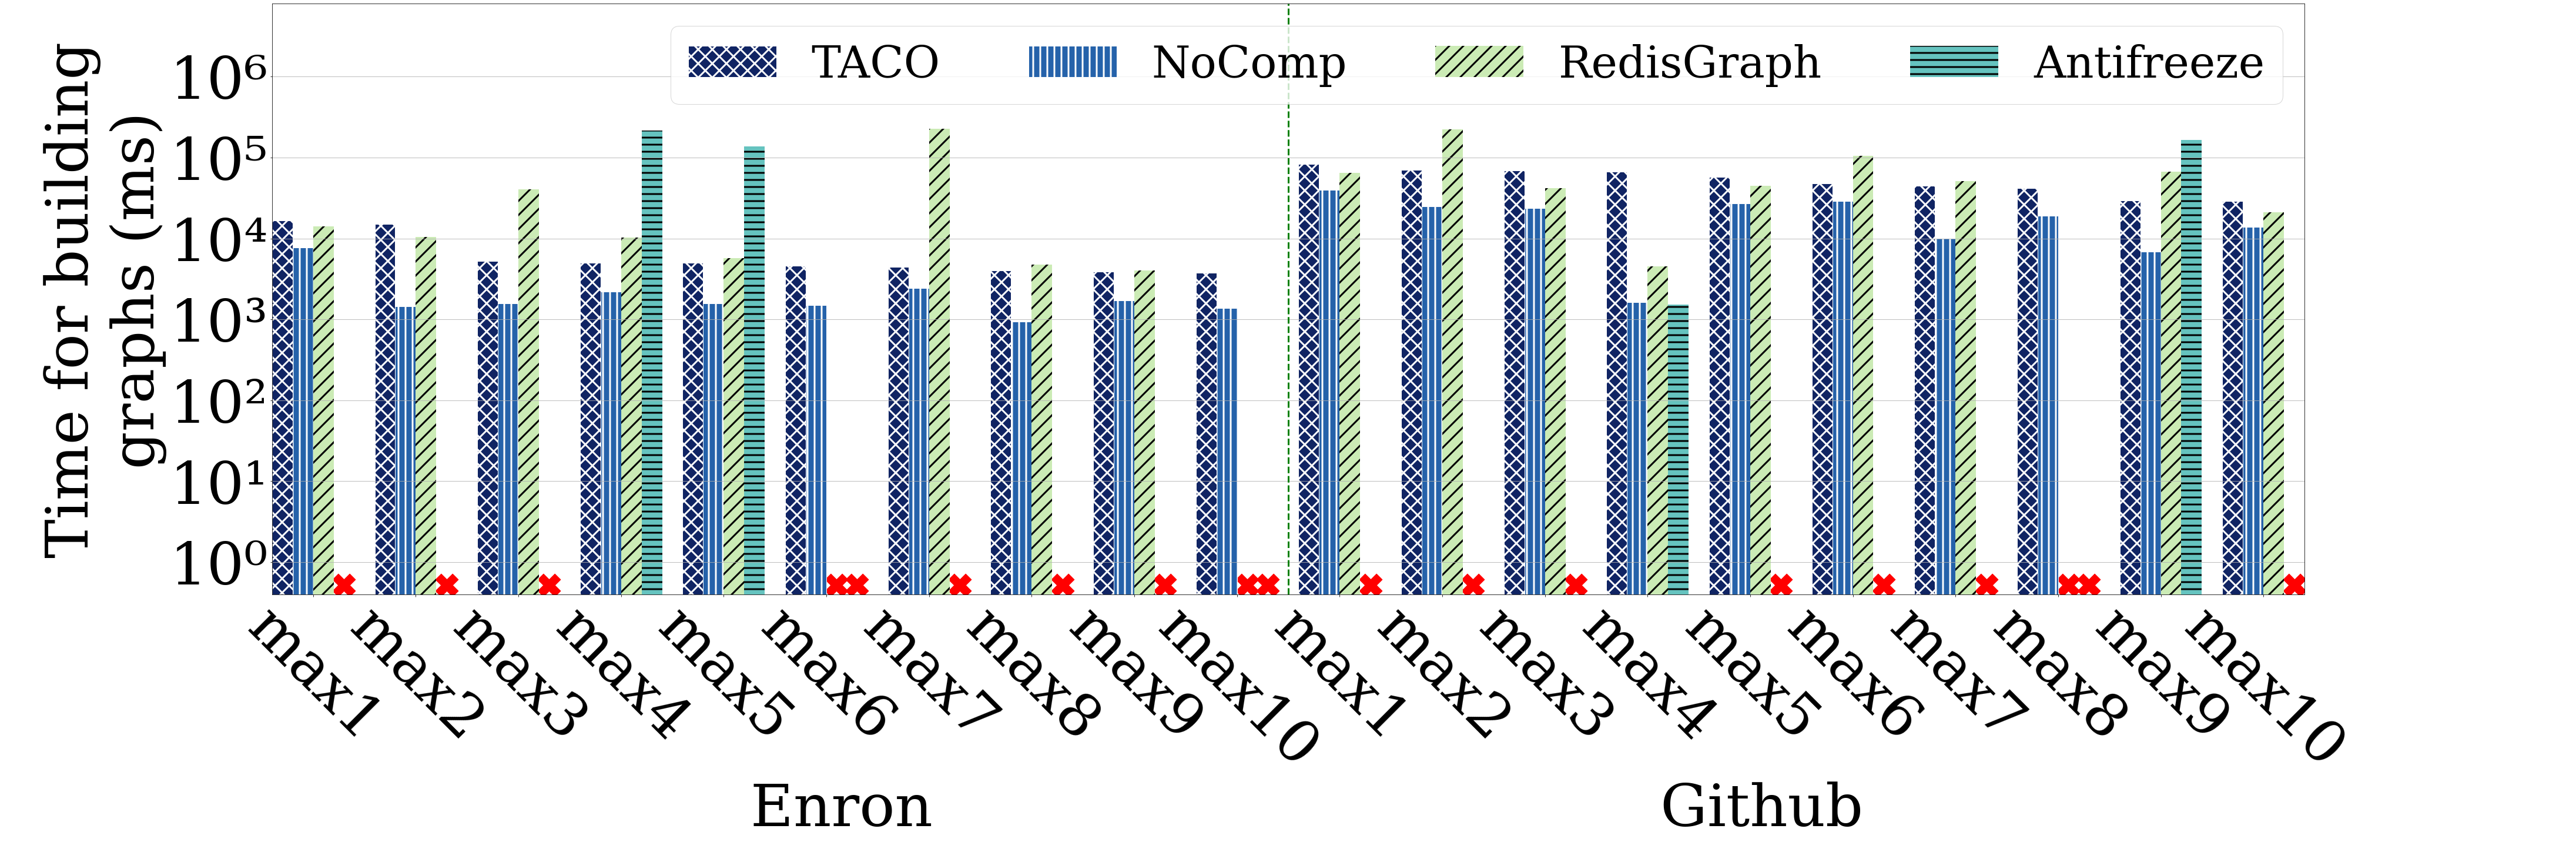

In [66]:
plot_bar_chart(graph_compare, 
               plot_filename_list,
               label_column_dict={"TACO": "TACO_GraphBuildTime", "NoComp": "NoComp_GraphBuildTime", "RedisGraph": "Redis_GraphBuildTime", "Antifreeze": "GraphBuildTime"},
               xlabel=plot_filename_label,
               ylabel="Time for building\n graphs (ms)",
               y_tick_min=0,
               y_tick_max=6,
               y_tick_num=6,
               y_lim=np.log10(1000000) + 0.9,
               legend_size=75,
               tick_size=100,
               label_size=100,
               fig_size=(55, 20),
               #save_path="./new_figs/graphbuild_compare.pdf"
              )

### 5.3 Graph Modify Time

In [67]:
enron_taco_modify = enron_taco_modify.rename(columns={"GraphModifyTime": "TACO_GraphModifyTime"})
github_taco_modify = github_taco_modify.rename(columns={"GraphModifyTime": "TACO_GraphModifyTime"})
enron_nocomp_modify = enron_nocomp_modify.rename(columns={"GraphModifyTime": "NoComp_GraphModifyTime"})
github_nocomp_modify = github_nocomp_modify.rename(columns={"GraphModifyTime": "NoComp_GraphModifyTime"})

In [68]:
enron_modify_merged = pd.merge(enron_taco_modify, enron_nocomp_modify, on=["fileName"], how="inner")[['fileName', 'TACO_GraphModifyTime', 'NoComp_GraphModifyTime']]
github_modify_merged = pd.merge(github_taco_modify, github_nocomp_modify, on=["fileName"], how="inner")[['fileName', 'TACO_GraphModifyTime', 'NoComp_GraphModifyTime']]

In [69]:
antifreeze_enron_modify = pd.read_excel(f"{top10_results}/enron_antifreeze_modify_results.xlsx")
antifreeze_github_modify = pd.read_excel(f"{top10_results}/github_antifreeze_modify_results.xlsx")

In [70]:
enron_modify_compare = dnf_process(pd.merge(enron_modify_merged, antifreeze_enron_modify, on=["fileName"], how="inner"), max_time=600000)
github_modify_compare = dnf_process(pd.merge(github_modify_merged, antifreeze_github_modify, on=["fileName"], how="inner"), max_time=600000)

In [71]:
column_list = ["fileName", "GraphModifyTime"]
df_enron_redis_1 = pd.read_csv(f"{enron_modify}/enron_RedisGraph_1.csv")[column_list]
df_enron_redis_2 = pd.read_csv(f"{enron_modify}/enron_RedisGraph_2.csv")[column_list]
df_enron_redis_3 = pd.read_csv(f"{enron_modify}/enron_RedisGraph_3.csv")[column_list]
df_github_redis_1 = pd.read_csv(f"{github_modify}/github_RedisGraph_1.csv")[column_list]
df_github_redis_2 = pd.read_csv(f"{github_modify}/github_RedisGraph_2.csv")[column_list]
df_github_redis_3 = pd.read_csv(f"{github_modify}/github_RedisGraph_3.csv")[column_list]
enron_graph_redis = pd.merge(df_enron_redis_1, df_enron_redis_2, how="inner", on=["fileName"])
enron_graph_redis = pd.merge(enron_graph_redis, df_enron_redis_3, how="inner", on=["fileName"])
github_graph_redis = pd.merge(df_github_redis_1, df_github_redis_2, how="inner", on=["fileName"])
github_graph_redis = pd.merge(github_graph_redis, df_github_redis_3, how="inner", on=["fileName"])
enron_graph_redis["Redis_GraphModifyTime"] = (enron_graph_redis["GraphModifyTime_x"] + enron_graph_redis["GraphModifyTime_y"] + enron_graph_redis["GraphModifyTime"]) / 3.
github_graph_redis["Redis_GraphModifyTime"] = (github_graph_redis["GraphModifyTime_x"] + github_graph_redis["GraphModifyTime_y"] + github_graph_redis["GraphModifyTime"]) / 3.
enron_graph_redis = enron_graph_redis[['fileName', "Redis_GraphModifyTime"]]
github_graph_redis = github_graph_redis[['fileName', "Redis_GraphModifyTime"]]

In [72]:
enron_modify_compare = dnf_process(pd.merge(enron_modify_compare, enron_graph_redis, on=["fileName"], how="inner"), max_time=600000)
github_modify_compare = dnf_process(pd.merge(github_modify_compare, github_graph_redis, on=["fileName"], how="inner"), max_time=600000)

In [73]:
modify_compare = pd.concat([enron_modify_compare, github_modify_compare]).reset_index(drop=True).set_index('fileName')
modify_compare = modify_compare.loc[filename_order].reset_index()
modify_compare

,fileName,TACO_GraphModifyTime,NoComp_GraphModifyTime,GraphModifyTime,Redis_GraphModifyTime
0,benjamin_rogers_000_1_1.pst.39.xls,64.333333,53.666667,300000.000000,31954.333333
1,vkaminski_001_1_2_1.pst.62.xls,161.000000,63.000000,300000.000000,28178.666667
2,mark_haedicke_000_1_2.pst.31.xls,1.666667,0.333333,300000.000000,24590.000000
3,gstorey_000_1_1.pst.116.xls,8.666667,10.333333,19440.333333,3938.333333
4,john_lavorato_000_1_1_1.pst.57.xls,14.666667,13.666667,106880.000000,5832.333333
5,phillip_m_love_000_1_1.pst.476.xls,5.333333,4.000000,300000.000000,300000.000000
6,harry_arora_000_1_1.pst.130.xls,9.666667,210.333333,300000.000000,126124.000000
7,jim_schwieger_000_1_1.pst.111.xls,6.000000,0.000000,300000.000000,25132.333333
8,vkaminski_002_1_1_1.pst.12.xls,50.333333,59.333333,300000.000000,6211.333333
9,kam_keiser_000_1_1.pst.16.xls,4.666667,4.333333,300000.000000,300000.000000


In [74]:
modify_compare.loc[17, 'Redis_GraphModifyTime'] = 300000.

<ipython-input-9-1e96aedf058a>:53: RuntimeWarning: divide by zero encountered in log10
  np.log10(arr) + 0.5,


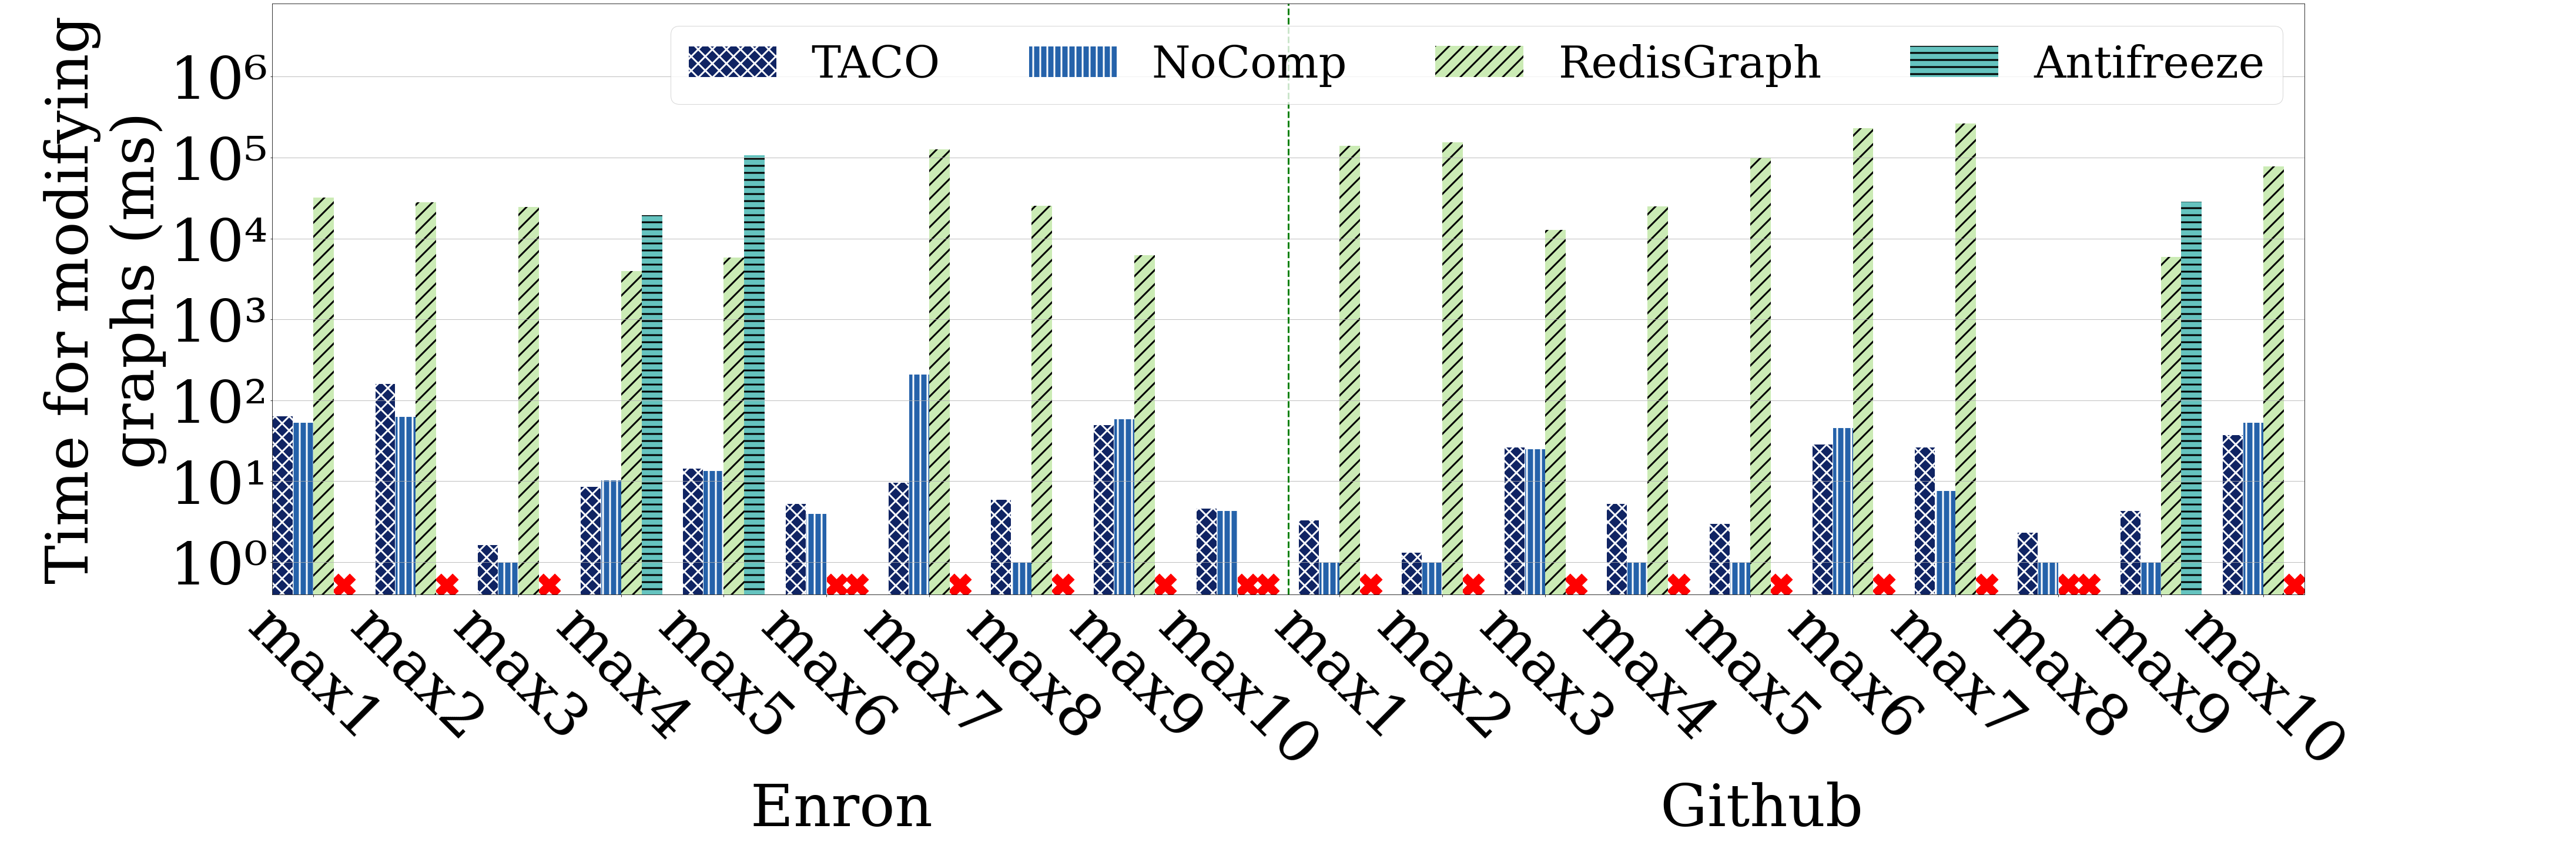

In [75]:
plot_bar_chart(modify_compare, 
               plot_filename_list,
               label_column_dict={"TACO": "TACO_GraphModifyTime", "NoComp": "NoComp_GraphModifyTime", "RedisGraph": "Redis_GraphModifyTime", "Antifreeze": "GraphModifyTime"},
               xlabel=plot_filename_label,
               ylabel="Time for modifying\n graphs (ms)",
               y_tick_min=0,
               y_tick_max=6,
               y_tick_num=6,
               y_lim=np.log10(1000000) + 0.9,
               legend_size=75,
               tick_size=100,
               label_size=100,
               fig_size=(55, 20),
               #save_path="./new_figs/modify_compare.pdf"
              )

### 5.4 Excel Lookup Time

In [76]:
excel_enron = pd.read_excel(f"{excel_results}/excel_enron_lookup_win.xlsx")
excel_github = pd.read_excel(f"{excel_results}/excel_github_lookup_win.xlsx")
taco_enron_win = pd.read_excel(f"{excel_results}/taco_enron_lookup_win.xlsx")
taco_github_win = pd.read_excel(f"{excel_results}/taco_github_lookup_win.xlsx")
nocomp_enron_win = pd.read_excel(f"{excel_results}/nocomp_enron_lookup_win.xlsx")
nocomp_github_win = pd.read_excel(f"{excel_results}/nocomp_github_lookup_win.xlsx")

In [77]:
column_list = ["fileName", "CalcLookupTime"]
calc_enron_1 = pd.read_csv(f"{calc_results}/enron_lookup1.csv")[column_list]
calc_enron_2 = pd.read_csv(f"{calc_results}/enron_lookup2.csv")[column_list]
calc_enron_3 = pd.read_csv(f"{calc_results}/enron_lookup3.csv")[column_list]
calc_enron = pd.merge(calc_enron_1, calc_enron_2, on=["fileName"], how="inner")
calc_enron = pd.merge(calc_enron, calc_enron_3, on=["fileName"], how="inner")
calc_enron["CalcLookupTime"] = (calc_enron["CalcLookupTime_x"] + calc_enron["CalcLookupTime_y"] + calc_enron["CalcLookupTime"]) / 3.0
calc_enron = calc_enron[column_list]
calc_github_1 = pd.read_excel(f"{calc_results}/github_lookup1.xlsx")[column_list]
calc_github_2 = pd.read_excel(f"{calc_results}/github_lookup2.xlsx")[column_list]
calc_github_3 = pd.read_excel(f"{calc_results}/github_lookup3.xlsx")[column_list]
calc_github = pd.merge(calc_github_1, calc_github_2, on=["fileName"], how="inner")
calc_github = pd.merge(calc_github, calc_github_3, on=["fileName"], how="inner")
calc_github["CalcLookupTime"] = (calc_github["CalcLookupTime_x"] + calc_github["CalcLookupTime_y"] + calc_github["CalcLookupTime"]) / 3.0
calc_github = calc_github[column_list]

In [78]:
excel_enron_compare = pd.merge(excel_enron, taco_enron_win, on=["fileName"], how="inner")
excel_enron_compare = pd.merge(excel_enron_compare, nocomp_enron_win, on=["fileName"], how="inner")[['fileName', 'Excel_LookupTime', 'LookupTime', 'NoCompLookupTime']]
excel_enron_compare = pd.merge(excel_enron_compare, calc_enron, on=["fileName"], how="inner")
excel_github_compare = pd.merge(excel_github, taco_github_win, on=["fileName"], how="inner")
excel_github_compare = pd.merge(excel_github_compare, nocomp_github_win, on=["fileName"], how="inner")[['fileName', 'Excel_LookupTime', 'LookupTime', 'NoCompLookupTime']]
excel_github_compare = pd.merge(excel_github_compare, calc_github, on=["fileName"], how="inner")

In [79]:
excel_lookup_compare = pd.concat([excel_enron_compare, excel_github_compare, ]).reset_index(drop=True)
excel_lookup_compare

,fileName,Excel_LookupTime,LookupTime,NoCompLookupTime,CalcLookupTime
0,joe_parks_000_1_1.pst.133.xls,5620.000000,79.666667,523.333333,133992.000000
1,kevin_ruscitti_000_1_1.pst.125.xls,9213.666667,170.666667,692.000000,4384.666667
2,benjamin_rogers_001_1_1.pst.153.xls,9640.333333,35.000000,174.000000,2896.333333
3,benjamin_rogers_000_1_1.pst.140.xls,38140.333333,60.333333,180.666667,2299.666667
4,jim_schwieger_000_1_1.pst.110.xls,9979.000000,172.000000,2185.333333,2441.333333
5,gerald_nemec_000_1_1.pst.11.xls,6385.666667,376.000000,2035.333333,6502.666667
6,vkaminski_001_1_2_1.pst.62.xls,9947.666667,322.666667,2197.333333,70504.666667
7,jeff_dasovich_000_1_1_1.pst.138.xls,8640.333333,28.666667,153.333333,2877.333333
8,benjamin_rogers_000_1_1.pst.190.xls,12338.666667,28.000000,342.666667,942.333333
9,benjamin_rogers_000_1_1.pst.191.xls,9958.333333,27.333333,154.000000,872.666667


<ipython-input-9-1e96aedf058a>:53: RuntimeWarning: divide by zero encountered in log10
  np.log10(arr) + 0.5,


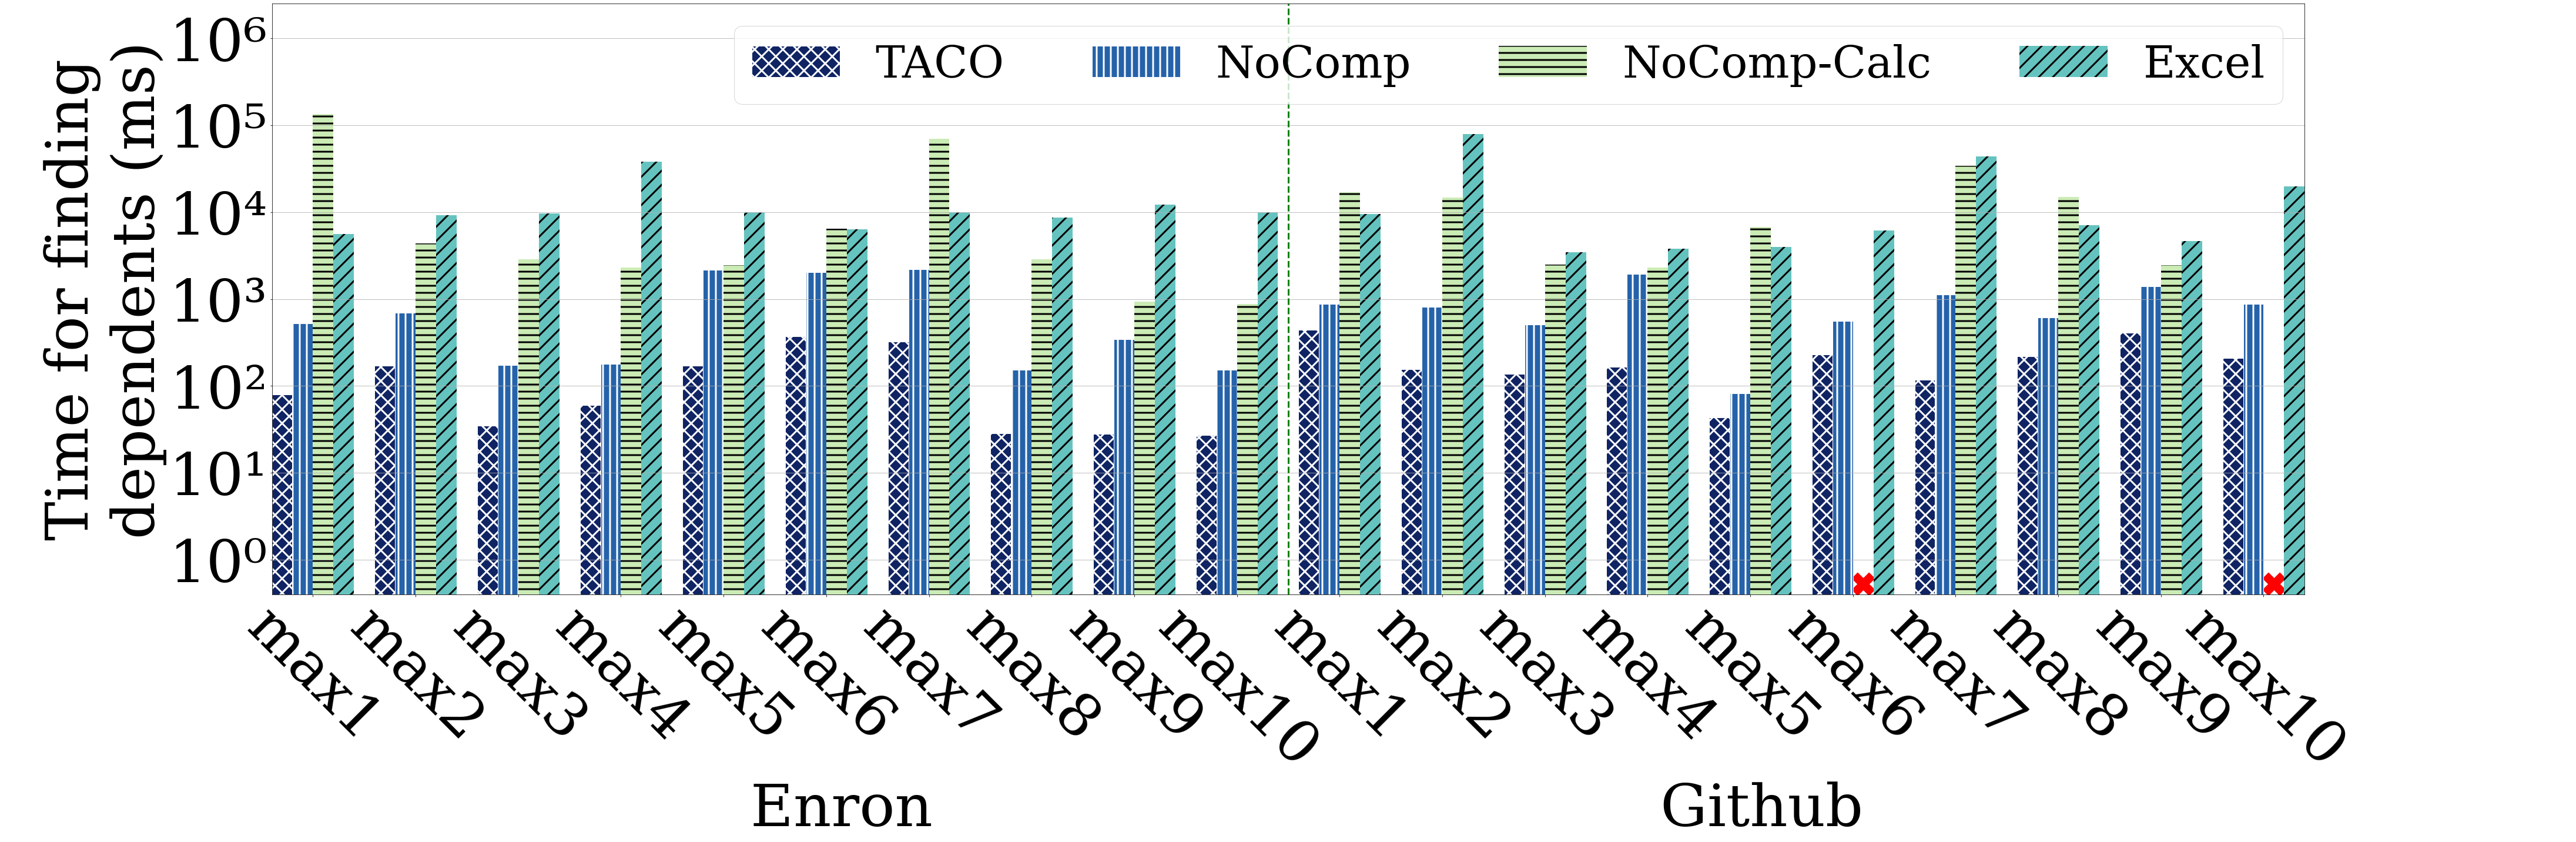

In [80]:
plot_bar_chart(excel_lookup_compare, 
               plot_filename_list,
               label_column_dict={"TACO": "LookupTime", "NoComp": "NoCompLookupTime", "NoComp-Calc": "CalcLookupTime", "Excel": "Excel_LookupTime"},
               xlabel=plot_filename_label,
               ylabel="Time for finding\n dependents (ms)",
               y_tick_min=0,
               y_tick_max=6,
               y_tick_num=6,
               y_lim=np.log10(1000000) + 0.4,
               legend_size=75,
               tick_size=100,
               label_size=100,
               fig_size=(55, 20),
               #save_path="./new_figs/excel_lookup_compare.pdf"
              )

## 6. Other

In [81]:
def get_bins_count(arr, bin_border):
    count = [0 for i in range(len(bin_border)+1)]
    for value in arr:
        for i in range(len(bin_border)):
            if value <= bin_border[i]:
                count[i] += 1
                break
            if value > bin_border[-1]:
                count[-1] += 1
                break
    for i in range(len(count)):
        count[i] /= len(arr)
    return count

In [82]:
def plot_hist_chart(df, 
                    xlabel,
                    ylabel,
                    y_tick_min,
                    y_tick_max,
                    y_tick_num,
                    label_column_dict, 
                    bar_width=0.2,
                    fig_size=(fig_width, fig_height),
                    legend_size=legend_size,
                    tick_size=tick_size,
                    label_size=label_size,
                    color_dict=color_dict,
                    hatch_dict=hatch_dict,
                    edge_color_dict=edge_color_dict,
                    bin_border=[100, 1000, 10000],
                    bin_label=["<=100", "100-1000", "1000-10000", ">10000"],
                    save_path=None
                   ):
    x_ticks = np.arange(len(bin_border)+1)
    x_ticks_min, x_ticks_max = 100, -100
    bar_labels = list(label_column_dict.keys())
    num_bars = len(bar_labels)
    fig, ax = plt.subplots(figsize=fig_size)
    for idx, bar_label in enumerate(bar_labels):
        x = x_ticks - ((num_bars - 1) * bar_width)/2 + idx * bar_width
        x_ticks_min = min(x.min(), x_ticks_min)
        x_ticks_max = max(x.max(), x_ticks_max)
        arr = df[label_column_dict[bar_label]].values
        arr = get_bins_count(arr, bin_border)
        if bar_label in edge_color_dict:
            rect = ax.bar(x_ticks - ((num_bars - 1) * bar_width)/2 + idx * bar_width,
                          arr,
                          bar_width, label=bar_label,
                          color=color_dict[bar_label],
                          hatch=hatch_dict[bar_label],
                          edgecolor=edge_color_dict[bar_label]
                         )
        else:
            rect = ax.bar(x_ticks - ((num_bars - 1) * bar_width)/2 + idx * bar_width,
                          arr,
                          bar_width, label=bar_label,
                          color=color_dict[bar_label],
                          hatch=hatch_dict[bar_label],
                         )
    
    ax.set_xlabel(xlabel, fontsize=label_size)
    ax.set_ylabel(ylabel, fontsize=label_size)
    
    y_ticks = np.arange(y_tick_min, y_tick_max+0.1, step=(y_tick_max - y_tick_min)/y_tick_num).astype(float)
    ax.set_yticks(y_ticks)
    ax.set_yticklabels(["{:.2f}".format(x) for x in y_ticks], fontsize=tick_size)
    ax.set_xticks(x_ticks)
    ax.set_xticklabels(bin_label, fontsize=tick_size, rotation=0)
    ax.legend(fontsize=legend_size, loc="best")
    #plt.xlim(x_ticks_min-bar_width/2.0, x_ticks_max+bar_width/2.0)
    #plt.ylim(-0.4, np.log10(5*60*1000) + 0.01)
    plt.grid(axis='y')
    fig.tight_layout()
    
    if save_path is not None:
        plt.savefig(save_path)
    plt.show()

In [83]:
enron_dep_ref = pd.read_excel(f"{notebook_home}/enron_dep_ref_10k.xlsx")
github_dep_ref = pd.read_excel(f"{notebook_home}/github_dep_ref_10k.xlsx")

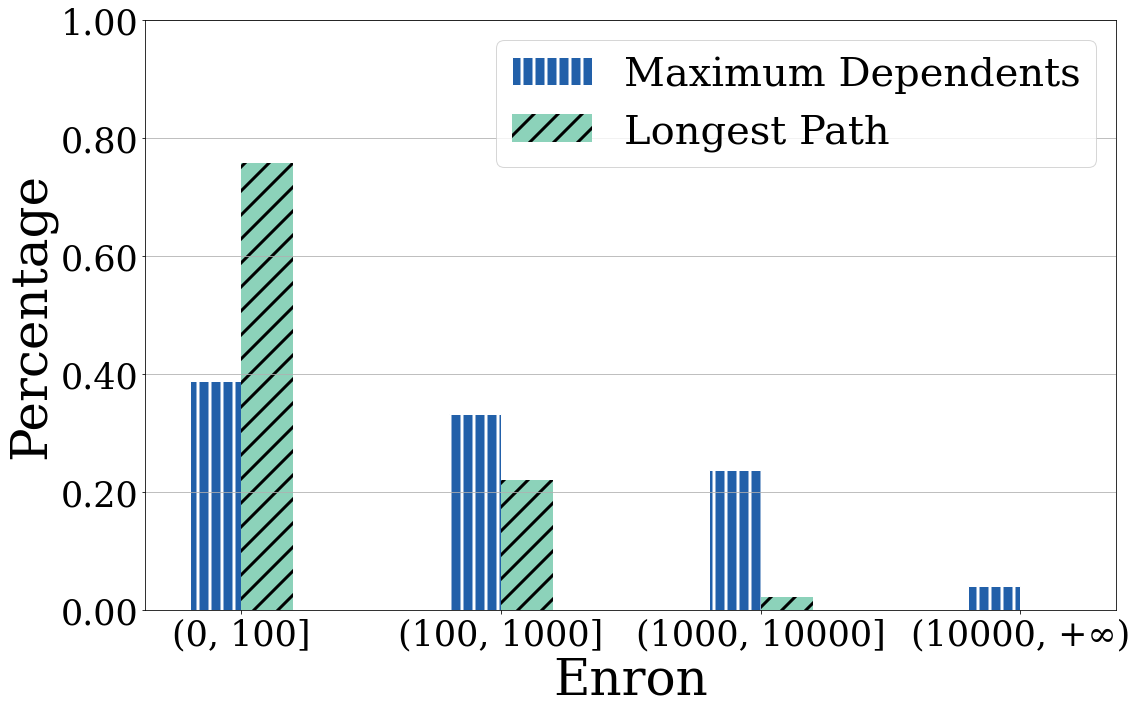

In [84]:
plot_hist_chart(enron_dep_ref, 
                xlabel="Enron",
                ylabel="Percentage",
                label_column_dict={"Maximum Dependents": 'Max Dep', "Longest Path": 'Longest Dep'},
                y_tick_min=0,
                y_tick_max=1.0,
                y_tick_num=5,
                legend_size=40,
                tick_size=35,
                label_size=50,
                fig_size=(16, 10),
                bin_border=[100, 1000, 10000],
                bin_label=["(0, 100]", "(100, 1000]", "(1000, 10000]", "(10000, +∞)"],
                #save_path="./new_figs/enron_hist.pdf"
               )

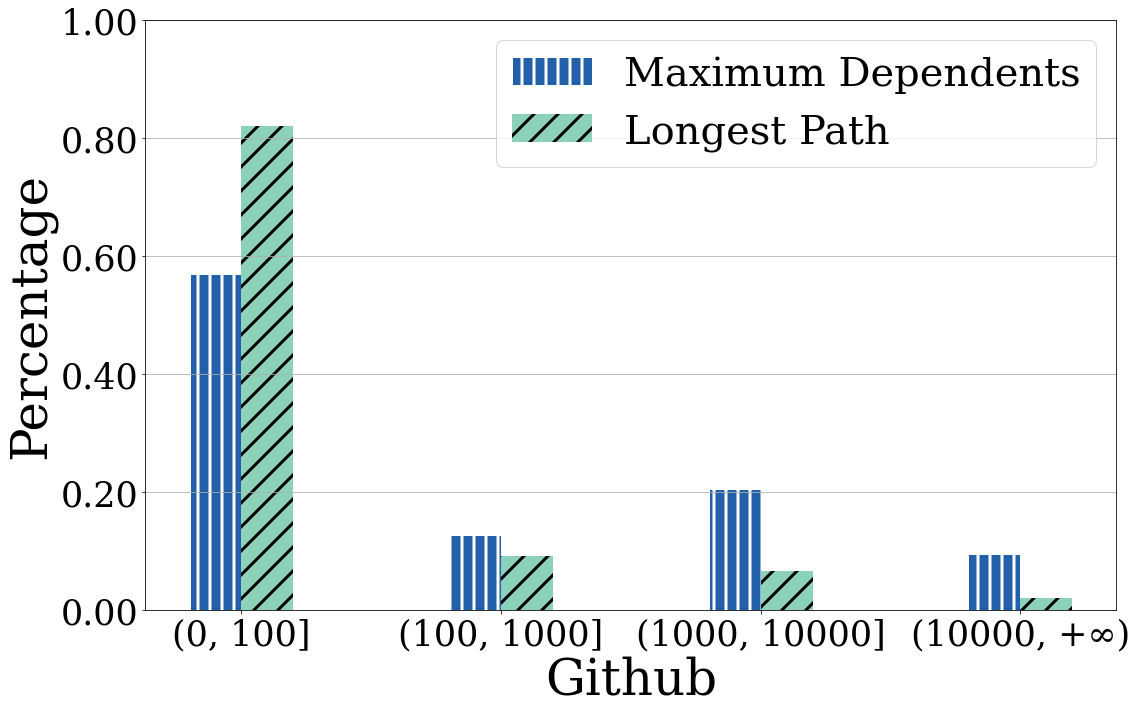

In [85]:
plot_hist_chart(github_dep_ref, 
                xlabel="Github",
                ylabel="Percentage",
                label_column_dict={"Maximum Dependents": 'Max Dep', "Longest Path": 'Longest Dep'},
                y_tick_min=0,
                y_tick_max=1.0,
                y_tick_num=5,
                legend_size=40,
                tick_size=35,
                label_size=50,
                fig_size=(16, 10),
                bin_border=[100, 1000, 10000],
                bin_label=["(0, 100]", "(100, 1000]", "(1000, 10000]", "(10000, +∞)"],
                #save_path="./new_figs/github_hist.pdf"
               )